# Powerball Research Project

## Possible Questions:
 - Is there a correlation between the game changing and the number of jackpot winners?
 - Is there a relationship between the state where the winning ticket was purchased and being a winner?
 - What are the most common winning combinations?
 - What are the most common winning numbers, including the powerball numbers?

## Introduction:

According to [Wikipedia](https://en.wikipedia.org/wiki/Powerball) the structure of the Powerball lottery from Apr 1992 to May 2020 is as follows:




|Starting date | White Balls | Red Ball | Jackpot chance | Power Play multiplier |
|:---|---:|---:|---:|---:|
|April 22, 1992 |	45 |	45 |	1:54,979,154 |	None† |
|November 5, 1997 |	49 |	42 |	1:80,089,127 |	None† |
|March 7, 2001 |	49 |	42 |	1:80,089,127 |	1x-5x |
|October 9, 2002 |	53 |	42 |	1:120,526,769 |	2x-5x |
|August 28, 2005 |	55 |	42 |	1:146,107,961 |	2x-5x |
| Jan 7, 2009   |      59	   |     39     |  1:195,249,054 |	    2x-5x   |
| Jan 15, 2012  |      59	   |     35	    |  1:175,223,510 |	     None   |
| Jan 19, 2014  |      59	   |     35	    |  1:175,223,510 |	    2x-5x   |
| Oct 7, 2015   |	     69	   |     26     |  1:292,201,338 | 	2x-5x; 10x‡ |

<p align='center'>†Power Play was introduced in 2001.
<p align='center'>‡10× available if jackpot is under $150 million.

The sources of my data are from:

- [Old Powerball Number Results: Starting in 1992](https://www.lottonumbers.com/powerball-results-1992)  
  I need to scrape this website in order to obtain the data I was not able to obtain in any other data set.  
  The results I scraped ranged from Apr 22, 1992 (the start of Powerball) to Dec 31, 2008.

- [Powerball Winning Numbers - Kaggle](https://www.kaggle.com/scotth64/powerball-numbers/data)  
  The data I took from this data set ranges from Jan 3, 2009 to Jan 30, 2010
  
- [Lottery Powerball Winning Numbers: Beginning 2010](https://catalog.data.gov/dataset/lottery-powerball-winning-numbers-beginning-2010)  
  It ranges in date from Feb 3, 2010 to May 30, 2020.

## Clean and explore my data:


In [ ]:
# Import some libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly
import plotly.graph_objs as go
import IPython
from IPython.display import HTML
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly as py
from plotly.graph_objs import *
import plotly.express as px
from plotly.subplots import make_subplots

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Assign a variable to each of my datasets:
pb92_08_url = 'https://raw.githubusercontent.com/jmmiddour/Datasets/master/Powerball/Powerball%201992-2008.csv'
pb09_10_url = 'https://raw.githubusercontent.com/jmmiddour/Datasets/master/Powerball/Powerball%202009-2010.csv'
pb10_20_url = 'https://raw.githubusercontent.com/jmmiddour/Datasets/master/Powerball/Powerball%202010-2020.csv'

In [ ]:
# Read in my files:
pb1 = pd.read_csv(pb92_08_url)
pb2 = pd.read_csv(pb09_10_url)
pb3 = pd.read_csv(pb10_20_url)

In [ ]:
# Check my first data set:
print (pb1.shape)
pb1.head()

(5447, 14)


,Draw Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,30th December 1992,1.0,11.0,18.0,30.0,41.0,12.0,0.0,$3.4 Million,R,NaN,NaN,NaN,NaN
1,26th December 1992,6.0,12.0,17.0,18.0,42.0,17.0,0.0,$2 Million,R,NaN,NaN,NaN,NaN
2,23rd December 1992,7.0,12.0,21.0,25.0,31.0,11.0,0.0,$10.4 Million,2,IA,MO,NaN,NaN
3,19th December 1992,11.0,16.0,32.0,37.0,39.0,27.0,0.0,$8.4 Million,R,NaN,NaN,NaN,NaN
4,16th December 1992,4.0,7.0,11.0,25.0,40.0,24.0,0.0,$6.4 Million,R,NaN,NaN,NaN,NaN


In [ ]:
# Check my second data set:
print (pb2.shape)
pb2.head()

(1279, 14)


,Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,1/30/2010,26.0,35.0,48.0,47.0,6.0,21.0,3.0,$92.5 Million,R,NaN,NaN,NaN,NaN
1,1/27/2010,15.0,26.0,31.0,6.0,20.0,9.0,5.0,$77.5 Million,R,NaN,NaN,NaN,NaN
2,1/23/2010,53.0,16.0,15.0,42.0,20.0,17.0,2.0,$65 Million,R,NaN,NaN,NaN,NaN
3,1/20/2010,46.0,15.0,43.0,44.0,32.0,19.0,4.0,$53.4 Million,R,NaN,NaN,NaN,NaN
4,1/16/2010,41.0,8.0,7.0,55.0,23.0,23.0,5.0,$41.9 Million,R,NaN,NaN,NaN,NaN


In [ ]:
# Check my third data set:
print (pb3.shape)
pb3.head()

(1078, 9)


,Draw Date,Winning Numbers,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,2/3/2010,17 22 36 37 52 24,2,$116 Million,R,NaN,NaN,NaN,NaN
1,2/6/2010,14 22 52 54 59 04,3,$141 Million,1,NC,NaN,NaN,NaN
2,2/10/2010,05 08 29 37 38 34,5,$20 Million,R,NaN,NaN,NaN,NaN
3,2/13/2010,10 14 30 40 51 01,4,$29.5 Million,R,NaN,NaN,NaN,NaN
4,2/17/2010,07 08 19 26 36 15,3,$44.2 Million,R,NaN,NaN,NaN,NaN


### Clean first data set:

In [ ]:
# Rename data to make the data set more usable:
pb1 = pb1.replace(['R', np.NaN], 0)

# Check my work:
pb1.isnull().sum()

Draw Date     0
No1           0
No2           0
No3           0
No4           0
No5           0
PB            0
Power Play    0
Jackpot       0
Winners       0
State1        0
State2        0
State3        0
State4        0
dtype: int64

In [ ]:
# Veiw my dataframe:
pb1.head()

,Draw Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,30th December 1992,1.0,11.0,18.0,30.0,41.0,12.0,0.0,$3.4 Million,0,0,0,0,0
1,26th December 1992,6.0,12.0,17.0,18.0,42.0,17.0,0.0,$2 Million,0,0,0,0,0
2,23rd December 1992,7.0,12.0,21.0,25.0,31.0,11.0,0.0,$10.4 Million,2,IA,MO,0,0
3,19th December 1992,11.0,16.0,32.0,37.0,39.0,27.0,0.0,$8.4 Million,0,0,0,0,0
4,16th December 1992,4.0,7.0,11.0,25.0,40.0,24.0,0.0,$6.4 Million,0,0,0,0,0


In [ ]:
# Remove $ and Million:
pb1['Jackpot'] = pb1['Jackpot'].str.replace(' Million', '')
pb1['Jackpot'] = pb1['Jackpot'].str.replace('$', '')

# Check my work:
pb1.head()

,Draw Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,30th December 1992,1.0,11.0,18.0,30.0,41.0,12.0,0.0,3.4,0,0,0,0,0
1,26th December 1992,6.0,12.0,17.0,18.0,42.0,17.0,0.0,2,0,0,0,0,0
2,23rd December 1992,7.0,12.0,21.0,25.0,31.0,11.0,0.0,10.4,2,IA,MO,0,0
3,19th December 1992,11.0,16.0,32.0,37.0,39.0,27.0,0.0,8.4,0,0,0,0,0
4,16th December 1992,4.0,7.0,11.0,25.0,40.0,24.0,0.0,6.4,0,0,0,0,0


In [ ]:
# Look at the end of my dataframe:
pb1.tail(10)  

# Need to increase tail size because there is a lot of extra rows.
pb1.tail(3705)  # After trial and error, found where the data I need ends.

,Draw Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
1742,2nd January 2008,2.0,11.0,31.0,34.0,48.0,5.0,4.0,52.7,0,0,0,0,0
1743,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
1744,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
1745,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
1746,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5442,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
5443,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
5444,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0
5445,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,0,0


In [ ]:
# Remove the extra rows:
pb1 = pb1.drop(pb1.index[1743:])

# Check my work:
pb1.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
1738,16th January 2008,9.0,18.0,19.0,38.0,47.0,11.0,5.0,97,1,LA,0,0,0
1739,12th January 2008,23.0,39.0,43.0,47.0,53.0,14.0,3.0,84.6,0,0,0,0,0
1740,9th January 2008,2.0,13.0,20.0,21.0,23.0,24.0,3.0,72.9,0,0,0,0,0
1741,5th January 2008,4.0,11.0,16.0,33.0,40.0,9.0,4.0,62.5,0,0,0,0,0
1742,2nd January 2008,2.0,11.0,31.0,34.0,48.0,5.0,4.0,52.7,0,0,0,0,0


In [ ]:
# Look at shape to verify changes:
pb1.shape

(1743, 14)

In [ ]:
# Look at my data types:
pb1.dtypes

Draw Date      object
No1           float64
No2           float64
No3           float64
No4           float64
No5           float64
PB            float64
Power Play    float64
Jackpot        object
Winners        object
State1         object
State2         object
State3         object
State4         object
dtype: object

In [ ]:
# Rename some of the columns:
pb1 = pb1.rename(columns={'Power Play':'PP', 'Jackpot':'Jackpot(M)', 'State1 ':'St1', 
                    'State2 ':'St2', 'State3':'St3', 'State4':'St4'})

# Check my work:
pb1.head(3)

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,30th December 1992,1.0,11.0,18.0,30.0,41.0,12.0,0.0,3.4,0,0,0,0,0
1,26th December 1992,6.0,12.0,17.0,18.0,42.0,17.0,0.0,2,0,0,0,0,0
2,23rd December 1992,7.0,12.0,21.0,25.0,31.0,11.0,0.0,10.4,2,IA,MO,0,0


In [ ]:
# Convert draw date to datetime format:
pb1['Draw Date'] = pd.to_datetime(pb1['Draw Date'], infer_datetime_format=True)

# Check my work:
pb1.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1992-12-30,1.0,11.0,18.0,30.0,41.0,12.0,0.0,3.4,0,0,0,0,0
1,1992-12-26,6.0,12.0,17.0,18.0,42.0,17.0,0.0,2,0,0,0,0,0
2,1992-12-23,7.0,12.0,21.0,25.0,31.0,11.0,0.0,10.4,2,IA,MO,0,0
3,1992-12-19,11.0,16.0,32.0,37.0,39.0,27.0,0.0,8.4,0,0,0,0,0
4,1992-12-16,4.0,7.0,11.0,25.0,40.0,24.0,0.0,6.4,0,0,0,0,0


In [ ]:
# Check the data type now:
pb1['Draw Date'].dtype

dtype('<M8[ns]')

In [ ]:
# Change features to integers:
pb1[['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 'PP', 
     'Winners']] = pb1[['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 'PP', 
                        'Winners']].astype(int)

# Change Jackpot to floats:
pb1['Jackpot(M)'] = pb1['Jackpot(M)'].astype(float)

# Check my work:
pb1.dtypes

Draw Date     datetime64[ns]
No1                    int64
No2                    int64
No3                    int64
No4                    int64
No5                    int64
PB                     int64
PP                     int64
Jackpot(M)           float64
Winners                int64
St1                   object
St2                   object
St3                   object
St4                   object
dtype: object

In [ ]:
# View the first 5 rows:
pb1.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1992-12-30,1,11,18,30,41,12,0,3.4,0,0,0,0,0
1,1992-12-26,6,12,17,18,42,17,0,2.0,0,0,0,0,0
2,1992-12-23,7,12,21,25,31,11,0,10.4,2,IA,MO,0,0
3,1992-12-19,11,16,32,37,39,27,0,8.4,0,0,0,0,0
4,1992-12-16,4,7,11,25,40,24,0,6.4,0,0,0,0,0


In [ ]:
# Sort values by the Date in ascending order:
pb1 = pb1.sort_values(by='Draw Date', ignore_index=True)

# Check my work:
pb1.head(10)

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1992-04-22,2,25,35,41,42,15,0,5.9,1,IN,0,0,0
1,1992-04-25,6,9,22,42,44,12,0,2.0,0,0,0,0,0
2,1992-04-29,1,8,10,28,35,10,0,4.0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,0,6.0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,4,0,7.8,0,0,0,0,0
5,1992-05-09,1,12,16,23,31,33,0,10.2,0,0,0,0,0
6,1992-05-13,3,6,13,33,43,37,0,12.5,1,MN,0,0,0
7,1992-05-16,2,9,19,28,30,38,0,2.0,0,0,0,0,0
8,1992-05-20,3,11,16,30,34,45,0,3.6,0,0,0,0,0
9,1992-05-23,23,27,28,36,44,26,0,5.5,0,0,0,0,0


In [ ]:
# Look at the last 10 rows:
pb1.tail(10)

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
1733,2008-11-29,5,33,36,39,55,21,4,20.0,0,0,0,0,0
1734,2008-12-03,16,17,21,25,55,3,5,25.0,0,0,0,0,0
1735,2008-12-06,9,35,39,43,53,10,5,30.0,0,0,0,0,0
1736,2008-12-10,6,15,24,37,41,37,4,35.0,0,0,0,0,0
1737,2008-12-13,14,26,28,31,40,13,2,43.0,0,0,0,0,0
1738,2008-12-17,7,11,18,24,30,26,4,50.6,0,0,0,0,0
1739,2008-12-20,3,14,19,32,54,24,5,54.7,0,0,0,0,0
1740,2008-12-24,2,17,22,32,41,8,5,64.0,0,0,0,0,0
1741,2008-12-27,12,15,26,31,43,10,5,72.3,0,0,0,0,0
1742,2008-12-31,7,8,11,17,53,36,5,81.9,0,0,0,0,0


### Clean second data set:

In [ ]:
# Look at the dataset:
print (pb2.shape)
pb2.head()

(1279, 14)


,Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,1/30/2010,26.0,35.0,48.0,47.0,6.0,21.0,3.0,$92.5 Million,R,NaN,NaN,NaN,NaN
1,1/27/2010,15.0,26.0,31.0,6.0,20.0,9.0,5.0,$77.5 Million,R,NaN,NaN,NaN,NaN
2,1/23/2010,53.0,16.0,15.0,42.0,20.0,17.0,2.0,$65 Million,R,NaN,NaN,NaN,NaN
3,1/20/2010,46.0,15.0,43.0,44.0,32.0,19.0,4.0,$53.4 Million,R,NaN,NaN,NaN,NaN
4,1/16/2010,41.0,8.0,7.0,55.0,23.0,23.0,5.0,$41.9 Million,R,NaN,NaN,NaN,NaN


In [ ]:
# Rename data to make the data set more usable:
pb2 = pb2.replace(['R', np.NaN], 0)

# Check my work:
pb2.isnull().sum()

Date          0
No1           0
No2           0
No3           0
No4           0
No5           0
PB            0
Power Play    0
Jackpot       0
Winners       0
State1        0
State2        0
State3        0
State4        0
dtype: int64

In [ ]:
# Remove $ and Million:
pb2['Jackpot'] = pb2['Jackpot'].str.replace(' Million', '')
pb2['Jackpot'] = pb2['Jackpot'].str.replace('$', '')

# Rename some of the columns:
pb2 = pb2.rename(columns={'Date':'Draw Date', 'Power Play':'PP', 'Jackpot':'Jackpot(M)', 
                          'State1 ':'St1', 'State2 ':'St2', 'State3':'St3', 
                          'State4':'St4'})

# Check my work:
pb2.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1/30/2010,26.0,35.0,48.0,47.0,6.0,21.0,3.0,92.5,0,0,0,0.0,0.0
1,1/27/2010,15.0,26.0,31.0,6.0,20.0,9.0,5.0,77.5,0,0,0,0.0,0.0
2,1/23/2010,53.0,16.0,15.0,42.0,20.0,17.0,2.0,65,0,0,0,0.0,0.0
3,1/20/2010,46.0,15.0,43.0,44.0,32.0,19.0,4.0,53.4,0,0,0,0.0,0.0
4,1/16/2010,41.0,8.0,7.0,55.0,23.0,23.0,5.0,41.9,0,0,0,0.0,0.0


In [ ]:
# Look at the data types:
pb2.dtypes

Draw Date      object
No1           float64
No2           float64
No3           float64
No4           float64
No5           float64
PB            float64
PP            float64
Jackpot(M)     object
Winners        object
St1            object
St2            object
St3           float64
St4           float64
dtype: object

In [ ]:
# Convert draw date to datetime format:
pb2['Draw Date'] = pd.to_datetime(pb2['Draw Date'], infer_datetime_format=True)

# Change some of the features to integers:
pb2[['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 'PP', 
     'Winners', 'St3', 'St4']] = pb2[['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 'PP', 
                        'Winners', 'St3', 'St4']].astype(int)

# Change Jackpot to floats:
pb2['Jackpot(M)'] = pb2['Jackpot(M)'].astype(float)

# Check my work:
pb2.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,2010-01-30,26,35,48,47,6,21,3,92.5,0,0,0,0,0
1,2010-01-27,15,26,31,6,20,9,5,77.5,0,0,0,0,0
2,2010-01-23,53,16,15,42,20,17,2,65.0,0,0,0,0,0
3,2010-01-20,46,15,43,44,32,19,4,53.4,0,0,0,0,0
4,2010-01-16,41,8,7,55,23,23,5,41.9,0,0,0,0,0


In [ ]:
# Check the data types now:
pb2.dtypes

Draw Date     datetime64[ns]
No1                    int64
No2                    int64
No3                    int64
No4                    int64
No5                    int64
PB                     int64
PP                     int64
Jackpot(M)           float64
Winners                int64
St1                   object
St2                   object
St3                    int64
St4                    int64
dtype: object

In [ ]:
# Look at the end of my dataframe:
pb2.tail(10)  

# Need to increase tail size because there is a lot of extra rows.
pb2.tail(1170)  # After trial and error, found where the data I need ends.

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
109,2009-01-14,46,34,25,8,39,34,5,147.0,0,0,0,0,0
110,2009-01-10,8,56,10,18,43,9,3,129.0,0,0,0,0,0
111,2009-01-07,31,52,23,33,38,24,5,105.0,0,0,0,0,0
112,2009-01-03,38,22,55,24,17,24,3,91.0,0,0,0,0,0
113,1970-01-01,0,0,0,0,0,0,0,NaN,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,1970-01-01,0,0,0,0,0,0,0,NaN,0,0,0,0,0
1275,1970-01-01,0,0,0,0,0,0,0,NaN,0,0,0,0,0
1276,1970-01-01,0,0,0,0,0,0,0,NaN,0,0,0,0,0
1277,1970-01-01,0,0,0,0,0,0,0,NaN,0,0,0,0,0


In [ ]:
# Remove the extra rows:
pb2 = pb2.drop(pb2.index[113:])

# Check my work:
pb2.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
108,2009-01-17,9,5,59,23,2,26,2,163.0,1,IN,0,0,0
109,2009-01-14,46,34,25,8,39,34,5,147.0,0,0,0,0,0
110,2009-01-10,8,56,10,18,43,9,3,129.0,0,0,0,0,0
111,2009-01-07,31,52,23,33,38,24,5,105.0,0,0,0,0,0
112,2009-01-03,38,22,55,24,17,24,3,91.0,0,0,0,0,0


In [ ]:
# Sort values by the Date in ascending order:
pb2 = pb2.sort_values(by='Draw Date', ignore_index=True)

# Check my work:
pb2.head(10)

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,2009-01-03,38,22,55,24,17,24,3,91.0,0,0,0,0,0
1,2009-01-07,31,52,23,33,38,24,5,105.0,0,0,0,0,0
2,2009-01-10,8,56,10,18,43,9,3,129.0,0,0,0,0,0
3,2009-01-14,46,34,25,8,39,34,5,147.0,0,0,0,0,0
4,2009-01-17,9,5,59,23,2,26,2,163.0,1,IN,0,0,0
5,2009-01-21,26,20,54,46,38,23,4,20.0,0,0,0,0,0
6,2009-01-24,6,37,42,20,25,25,2,25.0,0,0,0,0,0
7,2009-01-28,10,32,18,5,23,4,4,30.0,0,0,0,0,0
8,2009-01-31,33,26,14,41,1,37,4,43.1,0,0,0,0,0
9,2009-02-04,24,44,30,32,7,18,4,54.2,0,0,0,0,0


### Clean third data set:

In [ ]:
# Look at the data set:
print (pb3.shape)
pb3.head()

(1078, 9)


,Draw Date,Winning Numbers,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,2/3/2010,17 22 36 37 52 24,2,$116 Million,R,NaN,NaN,NaN,NaN
1,2/6/2010,14 22 52 54 59 04,3,$141 Million,1,NC,NaN,NaN,NaN
2,2/10/2010,05 08 29 37 38 34,5,$20 Million,R,NaN,NaN,NaN,NaN
3,2/13/2010,10 14 30 40 51 01,4,$29.5 Million,R,NaN,NaN,NaN,NaN
4,2/17/2010,07 08 19 26 36 15,3,$44.2 Million,R,NaN,NaN,NaN,NaN


In [ ]:
# Rename data to make the data set more usable:
pb3 = pb3.replace(['R', np.NaN], 0)

# Check my work:
pb3.isnull().sum()

Draw Date          0
Winning Numbers    0
Power Play         0
Jackpot            0
Winners            0
State1             0
State2             0
State3             0
State4             0
dtype: int64

In [ ]:
# Remove $ and Million:
pb3['Jackpot'] = pb3['Jackpot'].str.replace(' Million', '')
pb3['Jackpot'] = pb3['Jackpot'].str.replace('$', '')

# Check my work:
pb3.head()

,Draw Date,Winning Numbers,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,2/3/2010,17 22 36 37 52 24,2,116,0,0,0,0,0.0
1,2/6/2010,14 22 52 54 59 04,3,141,1,NC,0,0,0.0
2,2/10/2010,05 08 29 37 38 34,5,20,0,0,0,0,0.0
3,2/13/2010,10 14 30 40 51 01,4,29.5,0,0,0,0,0.0
4,2/17/2010,07 08 19 26 36 15,3,44.2,0,0,0,0,0.0


In [ ]:
# I need to seperate out the winning numbers into their own columns:
pb3[['No1', 'No2', 'No3', 'No4', 'No5', 'PB']] = pb3['Winning Numbers'].str.split(expand=True)
pb3.head()

,Draw Date,Winning Numbers,Power Play,Jackpot,Winners,State1,State2,State3,State4,No1,No2,No3,No4,No5,PB
0,2/3/2010,17 22 36 37 52 24,2,116,0,0,0,0,0.0,17,22,36,37,52,24
1,2/6/2010,14 22 52 54 59 04,3,141,1,NC,0,0,0.0,14,22,52,54,59,04
2,2/10/2010,05 08 29 37 38 34,5,20,0,0,0,0,0.0,05,08,29,37,38,34
3,2/13/2010,10 14 30 40 51 01,4,29.5,0,0,0,0,0.0,10,14,30,40,51,01
4,2/17/2010,07 08 19 26 36 15,3,44.2,0,0,0,0,0.0,07,08,19,26,36,15


In [ ]:
# Look at the column values:
pb3.columns.values

array(['Draw Date', 'Winning Numbers', 'Power Play', 'Jackpot', 'Winners',
       'State1 ', 'State2 ', 'State3', 'State4', 'No1', 'No2', 'No3',
       'No4', 'No5', 'PB'], dtype=object)

In [ ]:
# Remove "Winning Numbers":
pb3 = pb3.drop('Winning Numbers', axis=1)

# Move the new columns where "Winning Numbers" is:
col_tit = ['Draw Date',	'No1',	'No2',	'No3',	'No4',	'No5',	'PB',	
           'Power Play',	'Jackpot',	'Winners',	'State1 ',	'State2 ',	'State3',	
           'State4']
pb3 = pb3.reindex(columns=col_tit)

# Check my work:
pb3.head()

,Draw Date,No1,No2,No3,No4,No5,PB,Power Play,Jackpot,Winners,State1,State2,State3,State4
0,2/3/2010,17,22,36,37,52,24,2,116,0,0,0,0,0.0
1,2/6/2010,14,22,52,54,59,04,3,141,1,NC,0,0,0.0
2,2/10/2010,05,08,29,37,38,34,5,20,0,0,0,0,0.0
3,2/13/2010,10,14,30,40,51,01,4,29.5,0,0,0,0,0.0
4,2/17/2010,07,08,19,26,36,15,3,44.2,0,0,0,0,0.0


In [ ]:
# Rename some of the columns:
pb3 = pb3.rename(columns={'Power Play':'PP', 'Jackpot':'Jackpot(M)', 
                          'State1 ':'St1', 'State2 ':'St2', 'State3':'St3', 
                          'State4':'St4'})

# Check my work:
pb3.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,2/3/2010,17,22,36,37,52,24,2,116,0,0,0,0,0.0
1,2/6/2010,14,22,52,54,59,04,3,141,1,NC,0,0,0.0
2,2/10/2010,05,08,29,37,38,34,5,20,0,0,0,0,0.0
3,2/13/2010,10,14,30,40,51,01,4,29.5,0,0,0,0,0.0
4,2/17/2010,07,08,19,26,36,15,3,44.2,0,0,0,0,0.0


In [ ]:
# Look at the last 5 rows:
pb3.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
1073,5/16/2020,08,12,26,39,42,11,2,86.9,0,0,0,0,0.0
1074,5/20/2020,18,34,40,42,50,09,2,95.3,0,0,0,0,0.0
1075,5/23/2020,02,08,18,21,23,16,4,106,0,0,0,0,0.0
1076,5/27/2020,38,58,59,64,68,21,2,115,0,0,0,0,0.0
1077,5/30/2020,13,32,41,58,60,14,2,127,0,0,0,0,0.0


In [ ]:
# Look at the data types:
pb3.dtypes

Draw Date      object
No1            object
No2            object
No3            object
No4            object
No5            object
PB             object
PP              int64
Jackpot(M)     object
Winners        object
St1            object
St2            object
St3            object
St4           float64
dtype: object

In [ ]:
# Convert draw date to datetime format:
pb3['Draw Date'] = pd.to_datetime(pb3['Draw Date'], infer_datetime_format=True)

# Change some of the features to integers:
pb3[['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 'PP', 
     'Winners', 'St4']] = pb3[['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 'PP', 
                        'Winners', 'St4']].astype(int)

# Change Jackpot to floats:
pb3['Jackpot(M)'] = pb3['Jackpot(M)'].astype(float)

# Check my work:
pb2.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,2009-01-03,38,22,55,24,17,24,3,91.0,0,0,0,0,0
1,2009-01-07,31,52,23,33,38,24,5,105.0,0,0,0,0,0
2,2009-01-10,8,56,10,18,43,9,3,129.0,0,0,0,0,0
3,2009-01-14,46,34,25,8,39,34,5,147.0,0,0,0,0,0
4,2009-01-17,9,5,59,23,2,26,2,163.0,1,IN,0,0,0


In [ ]:
# Check the data types again:
pb3.dtypes

Draw Date     datetime64[ns]
No1                    int64
No2                    int64
No3                    int64
No4                    int64
No5                    int64
PB                     int64
PP                     int64
Jackpot(M)           float64
Winners                int64
St1                   object
St2                   object
St3                   object
St4                    int64
dtype: object

In [ ]:
# Sort values by the Date in ascending order:
pb3 = pb3.sort_values(by='Draw Date', ignore_index=True)

# Check my work:
pb3.head(10)

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,2010-02-03,17,22,36,37,52,24,2,116.0,0,0,0,0,0
1,2010-02-06,14,22,52,54,59,4,3,141.0,1,NC,0,0,0
2,2010-02-10,5,8,29,37,38,34,5,20.0,0,0,0,0,0
3,2010-02-13,10,14,30,40,51,1,4,29.5,0,0,0,0,0
4,2010-02-17,7,8,19,26,36,15,3,44.2,0,0,0,0,0
5,2010-02-20,13,27,37,41,54,32,2,61.7,0,0,0,0,0
6,2010-02-24,4,17,35,50,57,12,2,78.2,0,0,0,0,0
7,2010-02-27,18,47,51,53,58,30,2,96.5,0,0,0,0,0
8,2010-03-03,7,9,14,45,49,23,4,118.0,0,0,0,0,0
9,2010-03-06,10,29,33,41,59,15,2,144.0,0,0,0,0,0


## Merge my data sets:

In [ ]:
# Look at all 3 data sets - first 3 and last 3 rows:
# Need to verify that all the dates line up between the data sets before merging:
print ('pb1 data set:\n', pb1.head(3), '\n\n', pb1.tail(3), '\n')
print ('pb2 data set:\n', pb2.head(3), '\n\n', pb2.tail(3), '\n')
print ('pb3 data set:\n', pb3.head(3), '\n\n', pb3.tail(3))

pb1 data set:
    Draw Date  No1  No2  No3  No4  No5  ...  Jackpot(M)  Winners  St1  St2 St3 St4
0 1992-04-22    2   25   35   41   42  ...         5.9        1   IN    0   0   0
1 1992-04-25    6    9   22   42   44  ...         2.0        0    0    0   0   0
2 1992-04-29    1    8   10   28   35  ...         4.0        0    0    0   0   0

[3 rows x 14 columns] 

       Draw Date  No1  No2  No3  No4  No5  ...  Jackpot(M)  Winners  St1  St2 St3 St4
1740 2008-12-24    2   17   22   32   41  ...        64.0        0    0    0   0   0
1741 2008-12-27   12   15   26   31   43  ...        72.3        0    0    0   0   0
1742 2008-12-31    7    8   11   17   53  ...        81.9        0    0    0   0   0

[3 rows x 14 columns] 

pb2 data set:
    Draw Date  No1  No2  No3  No4  No5  ...  Jackpot(M)  Winners  St1  St2 St3 St4
0 2009-01-03   38   22   55   24   17  ...        91.0        0    0    0   0   0
1 2009-01-07   31   52   23   33   38  ...       105.0        0    0    0   0   0
2 200

In [ ]:
# Find out what my new number of rows should be:
print ('pb1: ' ,pb1.shape, '\n')
print ('pb2: ' ,pb2.shape, '\n')
print ('pb3: ' ,pb3.shape, '\n')
print ('Total:' ,pb1.shape[0] + pb2.shape[0] + pb3.shape[0])

pb1:  (1743, 14) 

pb2:  (113, 14) 

pb3:  (1078, 14) 

Total: 2934


In [ ]:
# Merge all the data sets together using concatination:
pb = pd.concat([pb1, pb2, pb3], axis=0, ignore_index=True)

# View my new dataframe:
print (pb.shape)
pb.sample(10)

(2934, 14)


,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
1903,2010-07-17,22,27,35,37,45,3,4,25.6,0,0,0,0,0
1334,2005-02-02,10,11,16,40,44,2,5,18.4,0,0,0,0,0
743,1999-06-05,2,8,16,37,49,11,0,44.7,0,0,0,0,0
2267,2014-01-11,10,15,33,48,54,34,1,80.0,0,0,0,0,0
2650,2017-09-13,17,24,35,57,63,19,3,115.0,0,0,0,0,0
973,2001-08-18,3,14,20,22,48,17,1,129.0,0,0,0,0,0
363,1995-10-14,9,12,32,40,44,32,0,18.2,0,0,0,0,0
559,1997-08-30,3,11,26,29,36,24,0,24.8,1,LA,0,0,0
2434,2015-08-19,6,8,43,48,50,7,2,80.0,0,0,0,0,0
2353,2014-11-08,9,19,33,38,54,15,3,202.0,1,MO,0,0,0


In [ ]:
# Check what the data types are of the merged dataframe:
pb.dtypes

Draw Date     datetime64[ns]
No1                    int64
No2                    int64
No3                    int64
No4                    int64
No5                    int64
PB                     int64
PP                     int64
Jackpot(M)           float64
Winners                int64
St1                   object
St2                   object
St3                   object
St4                   object
dtype: object

## Explore the data:

In [ ]:
# Need to change the data type to reformat only certain columns:
pb[['PP', 'Winners']] = pb[['PP', 'Winners']].astype(object)

# Add leading zero to values with only one integer:
for col in pb.columns:
  while pb[col].dtypes == 'int64':
    pb[col] = pb[col].map('{:02}'.format)

# Need to change PP and Winners back to ints:
pb[['PP', 'Winners']] = pb[['PP', 'Winners']].astype(int)

# Check my work:
pb.head()

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1992-04-22,02,25,35,41,42,15,0,5.9,1,IN,0,0,0
1,1992-04-25,06,09,22,42,44,12,0,2.0,0,0,0,0,0
2,1992-04-29,01,08,10,28,35,10,0,4.0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,0,6.0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,04,0,7.8,0,0,0,0,0


In [ ]:
# Add all winning numbers into one new column:
pb['Winning Combo'] = pb[pb.columns[1:7]].apply(lambda x: ' '.join(x.astype(str)), axis=1)
pb.head(10)

,Draw Date,No1,No2,No3,No4,No5,PB,PP,Jackpot(M),Winners,St1,St2,St3,St4,Winning Combo
0,1992-04-22,02,25,35,41,42,15,0,5.9,1,IN,0,0,0,02 25 35 41 42 15
1,1992-04-25,06,09,22,42,44,12,0,2.0,0,0,0,0,0,06 09 22 42 44 12
2,1992-04-29,01,08,10,28,35,10,0,4.0,0,0,0,0,0,01 08 10 28 35 10
3,1992-05-02,14,23,31,32,41,33,0,6.0,0,0,0,0,0,14 23 31 32 41 33
4,1992-05-06,27,29,30,36,43,04,0,7.8,0,0,0,0,0,27 29 30 36 43 04
5,1992-05-09,01,12,16,23,31,33,0,10.2,0,0,0,0,0,01 12 16 23 31 33
6,1992-05-13,03,06,13,33,43,37,0,12.5,1,MN,0,0,0,03 06 13 33 43 37
7,1992-05-16,02,09,19,28,30,38,0,2.0,0,0,0,0,0,02 09 19 28 30 38
8,1992-05-20,03,11,16,30,34,45,0,3.6,0,0,0,0,0,03 11 16 30 34 45
9,1992-05-23,23,27,28,36,44,26,0,5.5,0,0,0,0,0,23 27 28 36 44 26


In [ ]:
# Move the new column next to individual winning numbers:
col_tit = ['Draw Date',	'No1',	'No2',	'No3',	'No4',	'No5',	'PB',	
           'Winning Combo', 'PP',	'Jackpot(M)',	'Winners',	'St1',	'St2',	
           'St3',	'St4']
pb = pb.reindex(columns=col_tit)

# Check my work:
pb.head()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0
1,1992-04-25,06,09,22,42,44,12,06 09 22 42 44 12,0,2.0,0,0,0,0,0
2,1992-04-29,01,08,10,28,35,10,01 08 10 28 35 10,0,4.0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,14 23 31 32 41 33,0,6.0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,04,27 29 30 36 43 04,0,7.8,0,0,0,0,0


In [ ]:
# Create a new copy of the merged data set:
pb4 = pb
print (pb4.shape)
pb4.head(10)

(2934, 15)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0
1,1992-04-25,06,09,22,42,44,12,06 09 22 42 44 12,0,2.0,0,0,0,0,0
2,1992-04-29,01,08,10,28,35,10,01 08 10 28 35 10,0,4.0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,14 23 31 32 41 33,0,6.0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,04,27 29 30 36 43 04,0,7.8,0,0,0,0,0
5,1992-05-09,01,12,16,23,31,33,01 12 16 23 31 33,0,10.2,0,0,0,0,0
6,1992-05-13,03,06,13,33,43,37,03 06 13 33 43 37,0,12.5,1,MN,0,0,0
7,1992-05-16,02,09,19,28,30,38,02 09 19 28 30 38,0,2.0,0,0,0,0,0
8,1992-05-20,03,11,16,30,34,45,03 11 16 30 34 45,0,3.6,0,0,0,0,0
9,1992-05-23,23,27,28,36,44,26,23 27 28 36 44 26,0,5.5,0,0,0,0,0


In [ ]:
# Add all States into one new column:
pb4['All States'] = pb4[pb4.columns[11:]].apply(lambda x: ','.join(x.astype(str)), axis=1)
print (pb4.shape)
pb4.head(10)

(2934, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0,"IN,0,0,0"
1,1992-04-25,06,09,22,42,44,12,06 09 22 42 44 12,0,2.0,0,0,0,0,0,"0,0,0,0"
2,1992-04-29,01,08,10,28,35,10,01 08 10 28 35 10,0,4.0,0,0,0,0,0,"0,0,0,0"
3,1992-05-02,14,23,31,32,41,33,14 23 31 32 41 33,0,6.0,0,0,0,0,0,"0,0,0,0"
4,1992-05-06,27,29,30,36,43,04,27 29 30 36 43 04,0,7.8,0,0,0,0,0,"0,0,0,0"
5,1992-05-09,01,12,16,23,31,33,01 12 16 23 31 33,0,10.2,0,0,0,0,0,"0,0,0,0"
6,1992-05-13,03,06,13,33,43,37,03 06 13 33 43 37,0,12.5,1,MN,0,0,0,"MN,0,0,0"
7,1992-05-16,02,09,19,28,30,38,02 09 19 28 30 38,0,2.0,0,0,0,0,0,"0,0,0,0"
8,1992-05-20,03,11,16,30,34,45,03 11 16 30 34 45,0,3.6,0,0,0,0,0,"0,0,0,0"
9,1992-05-23,23,27,28,36,44,26,23 27 28 36 44 26,0,5.5,0,0,0,0,0,"0,0,0,0"


In [ ]:
# Look at the value counts and shape of the new dataframe and column:
print (pb4.shape)
pb4['All States'].value_counts().head(25)

(2934, 16)


0,0,0,0     2599
IN,0,0,0      30
MO,0,0,0      23
MN,0,0,0      17
WI,0,0,0      15
KY,0,0,0      14
PA,0,0,0      13
LA,0,0,0      13
FL,0,0,0      11
NY,0,0,0      10
AZ,0,0,0       9
CT,0,0,0       8
CA,0,0,0       8
WV,0,0,0       8
NH,0,0,0       8
NJ,0,0,0       7
IA,0,0,0       7
KS,0,0,0       7
DC,0,0,0       7
GA,0,0,0       6
RI,0,0,0       6
SC,0,0,0       6
MI,0,0,0       5
NM,0,0,0       5
OR,0,0,0       5
Name: All States, dtype: int64

In [ ]:
# Rename data to clean it up some more:
pb4 = pb4.replace(['0,0,0,0'], 0)
pb4['All States'] = pb4['All States'].str.rstrip(',0,0,0')
pb4['All States'] = pb4['All States'].str.rstrip(',0,0')
pb4['All States'] = pb4['All States'].str.rstrip(',0')
pb4 = pb4.replace([np.NaN], 0)
pb4['All States'].value_counts().sample(50)

MD           2
IA,MO        1
LA          13
KS           7
IN,MO        1
ID           5
GA           6
MO,PA        1
MO          23
MN          17
MT,OH        1
WI          15
MN,AZ        1
NH,MA        1
KY          14
NC           4
WV           8
KS,MO        1
KY,NE        1
TN           1
IA           7
DC,RI        1
MO,LA        1
MI           5
NC,PR,TX     1
AZ,NE,PA     1
DC           7
DE,IN        1
MA           3
PR           1
LA,FL,DE     1
NJ,NJ,MN     1
PA,SC        1
NJ           7
DE,PA        1
CA           8
OH           2
IN,MN        1
MT           2
DE           5
NE,MA        1
NY          10
IN          30
PA          13
OK           4
MO,AZ        1
IL           1
NM           5
CT           8
CA,FL,TN     1
Name: All States, dtype: int64

In [ ]:
# Look at the number of jackpot winners total:
pb4['Winners'].values.sum()

381

In [ ]:
# Look at the percentage of winners compared to the number of drawings:
print (((pb4['Winners'].values.sum() / (len(pb4))) * 100 ), '%')

12.985685071574643 %


In [ ]:
# Find the top 10 winning jackpot amounts:
pb4.sort_values(['Jackpot(M)'], ascending=False).groupby(['Winners']).head(10)

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2476,2016-01-13,04,08,19,27,34,10,04 08 19 27 34 10,2,1586.4,3,CA,FL,TN,0,"CA,FL,TN"
2475,2016-01-09,16,19,32,34,57,13,16 19 32 34 57 13,3,949.0,0,0,0,0,0,0
2810,2019-03-27,16,20,37,44,62,12,16 20 37 44 62 12,3,768.0,1,WI,0,0,0,WI
2644,2017-08-23,06,07,16,23,26,04,06 07 16 23 26 04,4,758.0,1,MA,0,0,0,MA
2767,2018-10-27,08,12,13,19,27,04,08 12 13 19 27 04,3,687.0,2,IA,NY,0,0,"IA,NY"
2809,2019-03-23,24,25,52,60,66,05,24 25 52 60 66 05,3,638.0,0,0,0,0,0,0
2766,2018-10-24,03,21,45,53,56,22,03 21 45 53 56 22,2,602.0,0,0,0,0,0,0
2199,2013-05-18,10,13,14,22,52,11,10 13 14 22 52 11,1,590.0,1,FL,0,0,0,FL
2150,2012-11-28,05,16,22,23,29,06,05 16 22 23 29 06,1,587.0,2,MO,AZ,0,0,"MO,AZ"
2380,2015-02-11,11,13,25,39,54,19,11 13 25 39 54 19,3,564.0,3,NC,PR,TX,0,"NC,PR,TX"


In [ ]:
# View the top 10 won jackpots:
top10 = (pb4['Jackpot(M)']>=456.0) & (pb4['Winners']>=1)
top10 = pb4[top10].sort_values(by='Jackpot(M)', ignore_index=True, 
                              ascending=False)
top10

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2016-01-13,04,08,19,27,34,10,04 08 19 27 34 10,2,1586.4,3,CA,FL,TN,0,"CA,FL,TN"
1,2019-03-27,16,20,37,44,62,12,16 20 37 44 62 12,3,768.0,1,WI,0,0,0,WI
2,2017-08-23,06,07,16,23,26,04,06 07 16 23 26 04,4,758.0,1,MA,0,0,0,MA
3,2018-10-27,08,12,13,19,27,04,08 12 13 19 27 04,3,687.0,2,IA,NY,0,0,"IA,NY"
4,2013-05-18,10,13,14,22,52,11,10 13 14 22 52 11,1,590.0,1,FL,0,0,0,FL
5,2012-11-28,05,16,22,23,29,06,05 16 22 23 29 06,1,587.0,2,MO,AZ,0,0,"MO,AZ"
6,2015-02-11,11,13,25,39,54,19,11 13 25 39 54 19,3,564.0,3,NC,PR,TX,0,"NC,PR,TX"
7,2018-01-06,12,61,30,29,33,26,12 61 30 29 33 26,3,559.0,1,NH,0,0,0,NH
8,2016-07-30,11,17,21,23,32,05,11 17 21 23 32 05,2,487.0,1,NH,0,0,0,NH
9,2018-03-17,22,57,59,60,66,07,22 57 59 60 66 07,2,456.0,1,PA,0,0,0,PA


In [ ]:
# Top 10 powerball number drawn counts:
pb_top10 = pb4['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_top10 = (pb_top10.head(10))
pb_top10

,PB,Counts
0,06,93
1,20,92
2,09,87
3,24,87
4,11,86
5,18,86
6,02,85
7,26,85
8,13,83
9,19,82


In [ ]:
# Merge all the state columns together using concatination:
states = pd.concat([pb4['St1'], pb4['St2'], pb4['St3'], pb4['St4']], 
                   axis=0, ignore_index=True)

# View my new dataframe:
print (states.shape)
states.sample(10)

(11736,)


2700     0
3825     0
6871     0
9178     0
8200     0
4030     0
279      0
8554     0
2402     0
11207    0
dtype: object

In [ ]:
# Remove rows with all 0 values:
states = states[states != 0]
states

0       IN
6       MN
10      IN
16      IN
20      WI
        ..
8069    DE
8090    MN
8248    TX
8344    TN
9777    NH
Length: 381, dtype: object

In [ ]:
# Get value counts to make sure all 0 were removed:
all_states = states.value_counts().rename_axis('State').reset_index(name='Counts')
all_states

,State,Counts
0,IN,40
1,MO,31
2,MN,22
3,KY,19
4,PA,18
5,WI,17
6,LA,16
7,FL,13
8,AZ,12
9,DC,11


In [ ]:
# Assign a variable to the top 10 states:
stateT10 = all_states.head(10)
stateT10

,State,Counts
0,IN,40
1,MO,31
2,MN,22
3,KY,19
4,PA,18
5,WI,17
6,LA,16
7,FL,13
8,AZ,12
9,DC,11


In [ ]:
# Are there any winning combos that were duplicated?
pb4['Winning Combo'].describe()

count                  2934
unique                 2933
top       15 22 24 32 39 18
freq                      2
Name: Winning Combo, dtype: object

In [ ]:
# Look at the only combo that repeated:
combo = pb4['Winning Combo'] == '15 22 24 32 39 18'
combo = pb4[combo].sort_values(by='Winning Combo', ignore_index=True, 
                              ascending=False)
combo

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1993-04-03,15,22,24,32,39,18,15 22 24 32 39 18,0,3.9,0,0,0,0,0,0
1,2000-12-27,15,22,24,32,39,18,15 22 24 32 39 18,0,32.8,2,DE,LA,0,0,"DE,LA"


In [ ]:
# Merge all the winning number columns together using concatination:
white = pd.concat([pb4['No1'], pb4['No2'], pb4['No3'], pb4['No4'], pb4['No5']], 
                   axis=0, ignore_index=True)

# View my new dataframe:
print (white.shape)
white.sample(10)

(14670,)


979      06
11635    16
12685    40
3256     14
10421    40
10053    41
4038     21
9083     43
6005     14
8463     19
dtype: object

In [ ]:
# Get value counts to see the top 10 white balls drawn:
whiteT10 = white.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10 = whiteT10.head(10)
whiteT10

,White Ball,Counts
0,26,296
1,41,293
2,23,293
3,32,293
4,42,288
5,16,288
6,39,286
7,28,286
8,22,284
9,09,281


## Subset data set by dates:

In [ ]:
# Create a subset of the values from start to first change:
pb_c1 = pb4[pb4['Draw Date'] <= '1997-11-04']
print (pb_c1.shape)
pb_c1.head(10)

(578, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0,IN
1,1992-04-25,06,09,22,42,44,12,06 09 22 42 44 12,0,2.0,0,0,0,0,0,0
2,1992-04-29,01,08,10,28,35,10,01 08 10 28 35 10,0,4.0,0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,14 23 31 32 41 33,0,6.0,0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,04,27 29 30 36 43 04,0,7.8,0,0,0,0,0,0
5,1992-05-09,01,12,16,23,31,33,01 12 16 23 31 33,0,10.2,0,0,0,0,0,0
6,1992-05-13,03,06,13,33,43,37,03 06 13 33 43 37,0,12.5,1,MN,0,0,0,MN
7,1992-05-16,02,09,19,28,30,38,02 09 19 28 30 38,0,2.0,0,0,0,0,0,0
8,1992-05-20,03,11,16,30,34,45,03 11 16 30 34 45,0,3.6,0,0,0,0,0,0
9,1992-05-23,23,27,28,36,44,26,23 27 28 36 44 26,0,5.5,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c1.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
573,1997-10-18,11,14,16,19,21,06,11 14 16 19 21 06,0,27.0,0,0,0,0,0,0
574,1997-10-22,05,09,23,40,43,24,05 09 23 40 43 24,0,31.4,0,0,0,0,0,0
575,1997-10-25,15,23,24,28,35,30,15 23 24 28 35 30,0,36.3,1,IN,0,0,0,IN
576,1997-10-29,06,11,13,26,32,37,06 11 13 26 32 37,0,5.0,0,0,0,0,0,0
577,1997-11-01,22,25,28,33,37,20,22 25 28 33 37 20,0,8.0,1,MO,0,0,0,MO


In [ ]:
# Create a subset of the values for the first to second change:
pb_c2 = pb4[(pb4['Draw Date'] >= '1997-11-05') & (pb4['Draw Date'] <= '2001-03-06')]
print (pb_c2.shape)
pb_c2.head(10)

(348, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
578,1997-11-05,02,19,24,28,35,26,02 19 24 28 35 26,0,10.0,0,0,0,0,0,0
579,1997-11-08,07,17,21,40,49,37,07 17 21 40 49 37,0,12.0,0,0,0,0,0,0
580,1997-11-12,13,14,16,29,41,01,13 14 16 29 41 01,0,14.0,0,0,0,0,0,0
581,1997-11-15,07,21,26,32,45,08,07 21 26 32 45 08,0,16.0,0,0,0,0,0,0
582,1997-11-19,03,10,19,21,48,22,03 10 19 21 48 22,0,18.0,0,0,0,0,0,0
583,1997-11-22,03,07,14,22,31,02,03 07 14 22 31 02,0,22.0,0,0,0,0,0,0
584,1997-11-26,15,23,34,40,46,35,15 23 34 40 46 35,0,25.8,0,0,0,0,0,0
585,1997-11-29,02,11,13,27,31,23,02 11 13 27 31 23,0,30.4,0,0,0,0,0,0
586,1997-12-03,09,14,18,42,47,32,09 14 18 42 47 32,0,35.2,0,0,0,0,0,0
587,1997-12-06,08,15,26,28,43,36,08 15 26 28 43 36,0,41.0,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c2.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
921,2001-02-17,04,22,31,39,41,06,04 22 31 39 41 06,0,79.9,0,0,0,0,0,0
922,2001-02-21,04,10,32,39,45,25,04 10 32 39 45 25,0,93.5,1,RI,0,0,0,RI
923,2001-02-24,29,30,34,41,49,37,29 30 34 41 49 37,0,10.0,0,0,0,0,0,0
924,2001-02-28,01,03,09,46,47,22,01 03 09 46 47 22,0,12.0,0,0,0,0,0,0
925,2001-03-03,08,09,23,36,44,15,08 09 23 36 44 15,0,14.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the second to third change:
pb_c3 = pb4[(pb4['Draw Date'] >= '2001-03-07') & (pb4['Draw Date'] <= '2002-10-08')]
print (pb_c3.shape)
pb_c3.head(10)

(166, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
926,2001-03-07,09,23,32,40,45,31,09 23 32 40 45 31,5,16.0,0,0,0,0,0,0
927,2001-03-10,12,19,26,30,33,11,12 19 26 30 33 11,3,21.0,0,0,0,0,0,0
928,2001-03-14,12,22,27,42,49,34,12 22 27 42 49 34,2,25.3,0,0,0,0,0,0
929,2001-03-17,15,16,18,20,36,18,15 16 18 20 36 18,5,30.1,0,0,0,0,0,0
930,2001-03-21,13,14,18,20,21,16,13 14 18 20 21 16,1,34.7,0,0,0,0,0,0
931,2001-03-24,02,28,37,40,49,22,02 28 37 40 49 22,5,40.0,0,0,0,0,0,0
932,2001-03-28,04,12,27,31,43,20,04 12 27 31 43 20,5,45.2,0,0,0,0,0,0
933,2001-03-31,11,27,37,39,41,42,11 27 37 39 41 42,2,52.5,0,0,0,0,0,0
934,2001-04-04,05,12,13,16,43,11,05 12 13 16 43 11,3,58.8,0,0,0,0,0,0
935,2001-04-07,18,20,31,37,41,01,18 20 31 37 41 01,4,66.1,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c3.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1087,2002-09-21,03,11,28,40,45,33,03 11 28 40 45 33,5,12.0,0,0,0,0,0,0
1088,2002-09-25,01,12,23,36,49,09,01 12 23 36 49 09,2,14.0,0,0,0,0,0,0
1089,2002-09-28,12,22,24,31,35,08,12 22 24 31 35 08,3,17.7,0,0,0,0,0,0
1090,2002-10-02,02,04,05,38,43,34,02 04 05 38 43 34,2,22.1,0,0,0,0,0,0
1091,2002-10-05,14,19,22,39,43,12,14 19 22 39 43 12,2,27.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the third to forth change:
pb_c4 = pb4[(pb4['Draw Date'] >= '2002-10-09') & (pb4['Draw Date'] <= '2005-08-27')]
print (pb_c4.shape)
pb_c4.head(10)

(302, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1092,2002-10-09,09,10,38,42,43,05,09 10 38 42 43 05,4,36.4,0,0,0,0,0,0
1093,2002-10-12,23,26,46,49,52,28,23 26 46 49 52 28,5,43.9,0,0,0,0,0,0
1094,2002-10-16,08,11,24,31,37,41,08 11 24 31 37 41,5,50.8,0,0,0,0,0,0
1095,2002-10-19,04,18,20,25,42,29,04 18 20 25 42 29,4,62.6,0,0,0,0,0,0
1096,2002-10-23,02,14,18,30,31,36,02 14 18 30 31 36,5,72.1,0,0,0,0,0,0
1097,2002-10-26,12,14,27,33,39,41,12 14 27 33 39 41,3,83.5,1,IN,0,0,0,IN
1098,2002-10-30,09,16,19,23,41,12,09 16 19 23 41 12,5,10.0,0,0,0,0,0,0
1099,2002-11-02,08,15,32,34,35,34,08 15 32 34 35 34,4,12.0,0,0,0,0,0,0
1100,2002-11-06,09,11,12,17,19,23,09 11 12 17 19 23,5,17.1,0,0,0,0,0,0
1101,2002-11-09,30,36,38,40,53,08,30 36 38 40 53 08,5,23.6,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c4.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1389,2005-08-13,01,02,18,37,43,37,01 02 18 37 43 37,4,10.0,0,0,0,0,0,0
1390,2005-08-17,03,08,30,43,53,15,03 08 30 43 53 15,5,12.3,0,0,0,0,0,0
1391,2005-08-20,13,27,28,29,49,36,13 27 28 29 49 36,4,18.8,0,0,0,0,0,0
1392,2005-08-24,09,11,26,35,51,32,09 11 26 35 51 32,5,25.0,0,0,0,0,0,0
1393,2005-08-27,08,22,31,39,44,11,08 22 31 39 44 11,5,32.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the forth to fifth change:
pb_c5 = pb4[(pb4['Draw Date'] >= '2005-08-28') & (pb4['Draw Date'] <= '2009-01-06')]
print (pb_c5.shape)
pb_c5.head(10)

(350, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1394,2005-08-31,13,17,19,41,50,13,13 17 19 41 50 13,2,43.5,0,0,0,0,0,0
1395,2005-09-03,01,03,30,31,43,36,01 03 30 31 43 36,4,52.0,0,0,0,0,0,0
1396,2005-09-07,12,32,40,50,54,37,12 32 40 50 54 37,3,60.2,0,0,0,0,0,0
1397,2005-09-10,08,10,11,48,50,16,08 10 11 48 50 16,4,70.9,0,0,0,0,0,0
1398,2005-09-14,21,24,42,49,50,01,21 24 42 49 50 01,4,81.1,0,0,0,0,0,0
1399,2005-09-17,05,09,27,49,52,06,05 09 27 49 52 06,2,95.3,0,0,0,0,0,0
1400,2005-09-21,03,28,34,35,50,08,03 28 34 35 50 08,3,109.0,0,0,0,0,0,0
1401,2005-09-24,02,10,31,43,55,14,02 10 31 43 55 14,5,126.0,0,0,0,0,0,0
1402,2005-09-28,07,22,27,48,50,17,07 22 27 48 50 17,2,142.0,0,0,0,0,0,0
1403,2005-10-01,08,18,38,45,54,23,08 18 38 45 54 23,5,167.0,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c5.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1739,2008-12-20,03,14,19,32,54,24,03 14 19 32 54 24,5,54.7,0,0,0,0,0,0
1740,2008-12-24,02,17,22,32,41,08,02 17 22 32 41 08,5,64.0,0,0,0,0,0,0
1741,2008-12-27,12,15,26,31,43,10,12 15 26 31 43 10,5,72.3,0,0,0,0,0,0
1742,2008-12-31,07,08,11,17,53,36,07 08 11 17 53 36,5,81.9,0,0,0,0,0,0
1743,2009-01-03,38,22,55,24,17,24,38 22 55 24 17 24,3,91.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the fifth to sixth change:
pb_c6 = pb4[(pb4['Draw Date'] >= '2009-01-07') & (pb4['Draw Date'] <= '2012-01-14')]
print (pb_c6.shape)
pb_c6.head(10)

(316, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1744,2009-01-07,31,52,23,33,38,24,31 52 23 33 38 24,5,105.0,0,0,0,0,0,0
1745,2009-01-10,08,56,10,18,43,09,08 56 10 18 43 09,3,129.0,0,0,0,0,0,0
1746,2009-01-14,46,34,25,08,39,34,46 34 25 08 39 34,5,147.0,0,0,0,0,0,0
1747,2009-01-17,09,05,59,23,02,26,09 05 59 23 02 26,2,163.0,1,IN,0,0,0,IN
1748,2009-01-21,26,20,54,46,38,23,26 20 54 46 38 23,4,20.0,0,0,0,0,0,0
1749,2009-01-24,06,37,42,20,25,25,06 37 42 20 25 25,2,25.0,0,0,0,0,0,0
1750,2009-01-28,10,32,18,05,23,04,10 32 18 05 23 04,4,30.0,0,0,0,0,0,0
1751,2009-01-31,33,26,14,41,01,37,33 26 14 41 01 37,4,43.1,0,0,0,0,0,0
1752,2009-02-04,24,44,30,32,07,18,24 44 30 32 07 18,4,54.2,0,0,0,0,0,0
1753,2009-02-07,18,53,05,28,20,27,18 53 05 28 20 27,2,66.6,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c6.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2055,2011-12-31,05,23,25,28,40,34,05 23 25 28 40 34,4,25.0,0,0,0,0,0,0
2056,2012-01-04,21,35,46,47,50,02,21 35 46 47 50 02,4,30.0,0,0,0,0,0,0
2057,2012-01-07,03,21,24,38,39,24,03 21 24 38 39 24,5,44.0,0,0,0,0,0,0
2058,2012-01-11,05,19,29,45,47,25,05 19 29 45 47 25,2,54.0,0,0,0,0,0,0
2059,2012-01-14,10,30,36,38,41,01,10 30 36 38 41 01,5,66.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the sixth to seventh change:
pb_c7 = pb4[(pb4['Draw Date'] >= '2012-01-15') & (pb4['Draw Date'] <= '2014-01-18')]
print (pb_c7.shape)
pb_c7.head(10)

(210, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2060,2012-01-18,06,29,34,44,50,28,06 29 34 44 50 28,1,80.0,0,0,0,0,0,0
2061,2012-01-21,12,24,43,44,45,07,12 24 43 44 45 07,1,100.0,0,0,0,0,0,0
2062,2012-01-25,04,19,28,29,47,05,04 19 28 29 47 05,1,120.0,0,0,0,0,0,0
2063,2012-01-28,05,33,41,54,59,13,05 33 41 54 59 13,1,146.0,0,0,0,0,0,0
2064,2012-02-01,08,13,17,34,59,35,08 13 17 34 59 35,1,170.0,0,0,0,0,0,0
2065,2012-02-04,15,23,43,45,56,07,15 23 43 45 56 07,1,200.0,0,0,0,0,0,0
2066,2012-02-08,17,28,38,39,51,33,17 28 38 39 51 33,1,250.0,0,0,0,0,0,0
2067,2012-02-11,01,10,37,52,57,11,01 10 37 52 57 11,1,336.0,1,RI,0,0,0,RI
2068,2012-02-15,11,12,32,52,56,11,11 12 32 52 56 11,1,40.0,0,0,0,0,0,0
2069,2012-02-18,23,28,50,56,59,05,23 28 50 56 59 05,1,50.0,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c7.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2265,2014-01-04,19,20,37,41,58,14,19 20 37 41 58 14,1,60.0,0,0,0,0,0,0
2266,2014-01-08,10,28,39,47,58,22,10 28 39 47 58 22,1,70.0,0,0,0,0,0,0
2267,2014-01-11,10,15,33,48,54,34,10 15 33 48 54 34,1,80.0,0,0,0,0,0,0
2268,2014-01-15,07,08,09,24,29,25,07 08 09 24 29 25,1,93.0,0,0,0,0,0,0
2269,2014-01-18,13,14,19,31,38,25,13 14 19 31 38 25,1,113.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the seventh to eighth change:
pb_c8 = pb4[(pb4['Draw Date'] >= '2014-01-19') & (pb4['Draw Date'] <= '2015-10-06')]
print (pb_c8.shape)
pb_c8.head(10)

(178, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2270,2014-01-22,01,02,07,09,55,29,01 02 07 09 55 29,3,131.0,0,0,0,0,0,0
2271,2014-01-25,08,12,18,55,57,02,08 12 18 55 57 02,2,152.0,0,0,0,0,0,0
2272,2014-01-29,11,23,28,32,47,20,11 23 28 32 47 20,2,171.0,0,0,0,0,0,0
2273,2014-02-01,05,12,15,27,38,07,05 12 15 27 38 07,2,194.0,0,0,0,0,0,0
2274,2014-02-05,08,17,32,57,59,24,08 17 32 57 59 24,3,215.0,0,0,0,0,0,0
2275,2014-02-08,24,25,34,37,54,29,24 25 34 37 54 29,2,247.0,0,0,0,0,0,0
2276,2014-02-12,36,44,49,52,57,01,36 44 49 52 57 01,2,284.0,0,0,0,0,0,0
2277,2014-02-15,02,09,14,21,23,03,02 09 14 21 23 03,3,330.0,0,0,0,0,0,0
2278,2014-02-19,01,17,35,49,54,34,01 17 35 49 54 34,3,425.0,1,CA,0,0,0,CA
2279,2014-02-22,02,03,13,14,54,04,02 03 13 14 54 04,5,40.0,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c8.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2443,2015-09-19,12,17,26,43,48,24,12 17 26 43 48 24,2,208.0,0,0,0,0,0,0
2444,2015-09-23,08,29,41,51,58,05,08 29 41 51 58 05,2,235.0,0,0,0,0,0,0
2445,2015-09-26,23,31,42,50,57,05,23 31 42 50 57 05,3,267.0,0,0,0,0,0,0
2446,2015-09-30,21,39,40,55,59,17,21 39 40 55 59 17,3,310.0,1,MI,0,0,0,MI
2447,2015-10-03,06,26,33,44,46,04,06 26 33 44 46 04,2,40.0,0,0,0,0,0,0


In [ ]:
# Create a subset of the values for the final change to 05/30/2020:
pb_c9 = pb4[pb4['Draw Date'] >= '2015-10-07']
print (pb_c9.shape)
pb_c9.head(10)

(486, 16)


,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2448,2015-10-07,18,30,40,48,52,09,18 30 40 48 52 09,3,50.0,0,0,0,0,0,0
2449,2015-10-10,12,27,29,43,68,01,12 27 29 43 68 01,2,60.0,0,0,0,0,0,0
2450,2015-10-14,15,20,29,31,40,01,15 20 29 31 40 01,2,70.0,0,0,0,0,0,0
2451,2015-10-17,48,49,57,62,69,19,48 49 57 62 69 19,3,80.0,0,0,0,0,0,0
2452,2015-10-21,30,32,42,56,57,11,30 32 42 56 57 11,4,90.0,0,0,0,0,0,0
2453,2015-10-24,20,31,56,60,64,02,20 31 56 60 64 02,3,100.0,0,0,0,0,0,0
2454,2015-10-28,04,54,56,62,63,10,04 54 56 62 63 10,2,110.0,0,0,0,0,0,0
2455,2015-10-31,09,20,25,47,68,07,09 20 25 47 68 07,2,127.0,0,0,0,0,0,0
2456,2015-11-04,02,12,17,20,65,17,02 12 17 20 65 17,4,144.0,1,TN,0,0,0,TN
2457,2015-11-07,07,16,25,50,53,15,07 16 25 50 53 15,2,40.0,0,0,0,0,0,0


In [ ]:
# Look at the last 5 rows to verify the change:
pb_c9.tail()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2929,2020-05-16,08,12,26,39,42,11,08 12 26 39 42 11,2,86.9,0,0,0,0,0,0
2930,2020-05-20,18,34,40,42,50,09,18 34 40 42 50 09,2,95.3,0,0,0,0,0,0
2931,2020-05-23,02,08,18,21,23,16,02 08 18 21 23 16,4,106.0,0,0,0,0,0,0
2932,2020-05-27,38,58,59,64,68,21,38 58 59 64 68 21,2,115.0,0,0,0,0,0,0
2933,2020-05-30,13,32,41,58,60,14,13 32 41 58 60 14,2,127.0,0,0,0,0,0,0


### Work with data set before 1st change:

In [ ]:
# Look at the data set:
pb_c1

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0,IN
1,1992-04-25,06,09,22,42,44,12,06 09 22 42 44 12,0,2.0,0,0,0,0,0,0
2,1992-04-29,01,08,10,28,35,10,01 08 10 28 35 10,0,4.0,0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,14 23 31 32 41 33,0,6.0,0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,04,27 29 30 36 43 04,0,7.8,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
573,1997-10-18,11,14,16,19,21,06,11 14 16 19 21 06,0,27.0,0,0,0,0,0,0
574,1997-10-22,05,09,23,40,43,24,05 09 23 40 43 24,0,31.4,0,0,0,0,0,0
575,1997-10-25,15,23,24,28,35,30,15 23 24 28 35 30,0,36.3,1,IN,0,0,0,IN
576,1997-10-29,06,11,13,26,32,37,06 11 13 26 32 37,0,5.0,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c1['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c1['Winners'].sum()/len(pb_c1['Draw Date'])*100, '%')

Total Number of Winners:  97 

Percentage of Winners vs Games:  16.782006920415224 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c1 = pd.concat([pb_c1['St1'], pb_c1['St2'], pb_c1['St3'], pb_c1['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c1 = st_t10_c1[st_t10_c1 != 0]

# View my new dataframe:
print (st_t10_c1.shape)
st_t10_c1 = st_t10_c1.value_counts().head(10)
st_t10_c1

(97,)


IN    20
MO    11
MN     7
KY     7
DC     7
WI     6
KS     6
NE     4
LA     4
AZ     4
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c1 = (pb_c1['Jackpot(M)']>=2.0) & (pb_c1['Winners']>=1)
t10_c1 = pb_c1[t10_c1].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c1

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1993-07-07,04,08,19,28,41,30,04 08 19 28 41 30,0,111.0,1,WI,0,0,0,WI
1,1994-11-30,05,13,24,29,31,40,05 13 24 29 31 40,0,101.0,2,IN,NE,0,0,"IN,NE"
2,1995-03-04,08,23,32,36,41,40,08 23 32 36 41 40,0,101.0,1,AZ,0,0,0,AZ
3,1993-12-22,01,03,13,15,29,12,01 03 13 15 29 12,0,89.5,2,DC,DC,0,0,"DC,DC"
4,1996-01-24,01,24,30,36,42,07,01 24 30 36 42 07,0,89.3,1,KY,0,0,0,KY
5,1995-06-03,07,20,21,26,27,45,07 20 21 26 27 45,0,87.5,1,ID,0,0,0,ID
6,1995-04-12,04,07,13,27,35,29,04 07 13 27 35 29,0,77.0,1,AZ,0,0,0,AZ
7,1995-11-25,21,32,33,34,41,34,21 32 33 34 41 34,0,69.0,1,MO,0,0,0,MO
8,1994-04-20,11,12,22,24,26,19,11 12 22 24 26 19,0,64.2,1,KY,0,0,0,KY
9,1993-03-03,05,09,15,16,26,44,05 09 15 16 26 44,0,59.1,2,MO,IN,0,0,"MO,IN"


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c1 = pd.concat([pb_c1['No1'], pb_c1['No2'], pb_c1['No3'], pb_c1['No4'], 
                      pb_c1['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c1 = white_c1.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c1 = whiteT10_c1.head(10)
whiteT10_c1

# View my new dataframe:
whiteT10_c1

,White Ball,Counts
0,35,78
1,15,77
2,11,77
3,26,74
4,28,72
5,36,72
6,01,71
7,23,71
8,06,71
9,22,70


In [ ]:
# Top 10 powerball numbers drawn counts:
pb_t10_c1 = pb_c1['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c1 = pb_t10_c1.head(10)
pb_t10_c1

,PB,Counts
0,12,24
1,10,21
2,09,20
3,26,20
4,42,18
5,37,17
6,29,16
7,01,16
8,19,16
9,06,16


### Work with data set 1st - 2nd change:

In [ ]:
# Look at the data set:
pb_c2

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
578,1997-11-05,02,19,24,28,35,26,02 19 24 28 35 26,0,10.0,0,0,0,0,0,0
579,1997-11-08,07,17,21,40,49,37,07 17 21 40 49 37,0,12.0,0,0,0,0,0,0
580,1997-11-12,13,14,16,29,41,01,13 14 16 29 41 01,0,14.0,0,0,0,0,0,0
581,1997-11-15,07,21,26,32,45,08,07 21 26 32 45 08,0,16.0,0,0,0,0,0,0
582,1997-11-19,03,10,19,21,48,22,03 10 19 21 48 22,0,18.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,2001-02-17,04,22,31,39,41,06,04 22 31 39 41 06,0,79.9,0,0,0,0,0,0
922,2001-02-21,04,10,32,39,45,25,04 10 32 39 45 25,0,93.5,1,RI,0,0,0,RI
923,2001-02-24,29,30,34,41,49,37,29 30 34 41 49 37,0,10.0,0,0,0,0,0,0
924,2001-02-28,01,03,09,46,47,22,01 03 09 46 47 22,0,12.0,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c2['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c2['Winners'].sum()/len(pb_c2['Draw Date'])*100, '%')

Total Number of Winners:  44 

Percentage of Winners vs Games:  12.643678160919542 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c2 = pd.concat([pb_c2['St1'], pb_c2['St2'], pb_c2['St3'], pb_c2['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c2 = st_t10_c2[st_t10_c2 != 0]

# View my new dataframe:
print (st_t10_c2.shape)
st_t10_c2 = st_t10_c2.value_counts().head(10)
st_t10_c2

(44,)


MO    7
MN    6
IN    4
WI    4
KY    4
NE    3
NH    3
IA    2
RI    2
DC    2
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c2 = (pb_c2['Jackpot(M)']>=2.0) & (pb_c2['Winners']>=1)
t10_c2 = pb_c2[t10_c2].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c2

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1998-07-29,08,39,43,45,49,13,08 39 43 45 49 13,0,295.0,1,IN,0,0,0,IN
1,1998-05-20,04,09,30,34,48,08,04 09 30 34 48 08,0,195.0,1,WI,0,0,0,WI
2,1999-06-30,05,10,12,20,40,03,05 10 12 20 40 03,0,151.0,1,MN,0,0,0,MN
3,2000-03-04,03,06,08,43,48,01,03 06 08 43 48 01,0,150.0,3,KS,MO,MN,0,"KS,MO,MN"
4,2000-11-29,01,04,20,27,29,17,01 04 20 27 29 17,0,130.0,1,NM,0,0,0,NM
5,2001-02-21,04,10,32,39,45,25,04 10 32 39 45 25,0,93.5,1,RI,0,0,0,RI
6,2000-04-19,03,08,09,20,49,22,03 08 09 20 49 22,0,79.7,1,KY,0,0,0,KY
7,1999-03-27,05,12,13,45,48,35,05 12 13 45 48 35,0,70.2,2,MT,WI,0,0,"MT,WI"
8,1999-01-16,02,15,20,28,40,15,02 15 20 28 40 15,0,67.1,1,NH,0,0,0,NH
9,1997-12-17,03,05,13,18,45,20,03 05 13 18 45 20,0,66.4,1,NH,0,0,0,NH


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c2 = pd.concat([pb_c2['No1'], pb_c2['No2'], pb_c2['No3'], pb_c2['No4'], 
                      pb_c2['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c2 = white_c2.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c2 = whiteT10_c2.head(10)
whiteT10_c2


# View my new dataframe:
whiteT10_c2

,White Ball,Counts
0,15,47
1,04,44
2,05,43
3,42,43
4,32,43
5,41,42
6,08,41
7,12,41
8,03,41
9,26,40


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c2 = pb_c2['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c2 = pb_t10_c2.head(10)
pb_t10_c2

,PB,Counts
0,06,14
1,37,13
2,26,13
3,07,12
4,20,12
5,18,12
6,25,12
7,14,11
8,35,10
9,33,10


### Work with data set 2nd - 3rd change:

In [ ]:
# Look at the data set:
pb_c3

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
926,2001-03-07,09,23,32,40,45,31,09 23 32 40 45 31,5,16.0,0,0,0,0,0,0
927,2001-03-10,12,19,26,30,33,11,12 19 26 30 33 11,3,21.0,0,0,0,0,0,0
928,2001-03-14,12,22,27,42,49,34,12 22 27 42 49 34,2,25.3,0,0,0,0,0,0
929,2001-03-17,15,16,18,20,36,18,15 16 18 20 36 18,5,30.1,0,0,0,0,0,0
930,2001-03-21,13,14,18,20,21,16,13 14 18 20 21 16,1,34.7,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,2002-09-21,03,11,28,40,45,33,03 11 28 40 45 33,5,12.0,0,0,0,0,0,0
1088,2002-09-25,01,12,23,36,49,09,01 12 23 36 49 09,2,14.0,0,0,0,0,0,0
1089,2002-09-28,12,22,24,31,35,08,12 22 24 31 35 08,3,17.7,0,0,0,0,0,0
1090,2002-10-02,02,04,05,38,43,34,02 04 05 38 43 34,2,22.1,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c3['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c3['Winners'].sum()/len(pb_c3['Draw Date'])*100, '%')

Total Number of Winners:  19 

Percentage of Winners vs Games:  11.44578313253012 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c3 = pd.concat([pb_c3['St1'], pb_c3['St2'], pb_c3['St3'], pb_c3['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c3 = st_t10_c3[st_t10_c3 != 0]

# View my new dataframe:
print (st_t10_c3.shape)
st_t10_c3 = st_t10_c3.value_counts().head(10)
st_t10_c3

(19,)


KY    3
MO    2
MN    2
IN    2
AZ    2
WV    1
MA    1
DC    1
LA    1
NH    1
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c3 = (pb_c3['Jackpot(M)']>=2.0) & (pb_c3['Winners']>=1)
t10_c3 = pb_c3[t10_c3].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c3

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2001-08-25,08,17,22,42,47,21,08 17 22 42 47 21,2,295.0,4,DE,KY,MN,NH,"DE,KY,MN,NH"
1,2002-09-14,05,14,26,31,40,29,05 14 26 31 40 29,4,103.0,2,PA,IN,0,0,"PA,IN"
2,2002-01-26,05,14,15,22,30,31,05 14 15 22 30 31,4,95.3,1,AZ,0,0,0,AZ
3,2001-04-14,03,08,16,29,30,04,03 08 16 29 30 04,2,83.9,1,AZ,0,0,0,AZ
4,2002-05-15,30,33,36,37,49,35,30 33 36 37 49 35,5,78.7,1,MA,0,0,0,MA
5,2001-05-30,11,12,28,36,43,09,11 12 28 36 43 09,1,61.9,1,MO,0,0,0,MO
6,2001-11-07,02,04,06,17,25,31,02 04 06 17 25 31,1,55.2,1,DC,0,0,0,DC
7,2001-09-26,18,26,30,35,44,19,18 26 30 35 44 19,4,48.3,1,IN,0,0,0,IN
8,2002-03-27,15,35,40,43,46,33,15 35 40 43 46 33,3,48.1,1,LA,0,0,0,LA
9,2002-07-20,02,03,06,13,26,10,02 03 06 13 26 10,1,41.5,1,KY,0,0,0,KY


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c3 = pd.concat([pb_c3['No1'], pb_c3['No2'], pb_c3['No3'], pb_c3['No4'], 
                      pb_c3['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c3 = white_c3.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c3 = whiteT10_c3.head(10)
whiteT10_c3

# View my new dataframe:
whiteT10_c3

,White Ball,Counts
0,19,23
1,16,23
2,36,22
3,06,21
4,49,21
5,40,21
6,22,21
7,02,21
8,27,21
9,35,21


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c3 = pb_c3['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c3 = pb_t10_c3.head(10)
pb_t10_c3

,PB,Counts
0,20,11
1,13,7
2,31,7
3,02,6
4,37,6
5,33,6
6,22,6
7,17,5
8,34,5
9,19,5


### Work with data set 3rd - 4th change:

In [ ]:
# Look at the data set:
pb_c4

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1092,2002-10-09,09,10,38,42,43,05,09 10 38 42 43 05,4,36.4,0,0,0,0,0,0
1093,2002-10-12,23,26,46,49,52,28,23 26 46 49 52 28,5,43.9,0,0,0,0,0,0
1094,2002-10-16,08,11,24,31,37,41,08 11 24 31 37 41,5,50.8,0,0,0,0,0,0
1095,2002-10-19,04,18,20,25,42,29,04 18 20 25 42 29,4,62.6,0,0,0,0,0,0
1096,2002-10-23,02,14,18,30,31,36,02 14 18 30 31 36,5,72.1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1389,2005-08-13,01,02,18,37,43,37,01 02 18 37 43 37,4,10.0,0,0,0,0,0,0
1390,2005-08-17,03,08,30,43,53,15,03 08 30 43 53 15,5,12.3,0,0,0,0,0,0
1391,2005-08-20,13,27,28,29,49,36,13 27 28 29 49 36,4,18.8,0,0,0,0,0,0
1392,2005-08-24,09,11,26,35,51,32,09 11 26 35 51 32,5,25.0,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c4['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c4['Winners'].sum()/len(pb_c4['Draw Date'])*100, '%')

Total Number of Winners:  43 

Percentage of Winners vs Games:  14.23841059602649 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c4 = pd.concat([pb_c4['St1'], pb_c4['St2'], pb_c4['St3'], pb_c4['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c4 = st_t10_c4[st_t10_c4 != 0]

# View my new dataframe:
print (st_t10_c4.shape)
st_t10_c4 = st_t10_c4.value_counts().head(10)
st_t10_c4

(43,)


PA    8
IN    7
WV    3
MN    3
SC    3
NH    2
ID    2
LA    2
MO    2
AZ    1
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c4 = (pb_c4['Jackpot(M)']>=2.0) & (pb_c4['Winners']>=1)
t10_c4 = pb_c4[t10_c4].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c4

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2002-12-25,05,14,16,29,53,07,05 14 16 29 53 07,4,314.0,1,WV,0,0,0,WV
1,2003-07-09,19,21,26,31,51,40,19 21 26 31 51 40,3,261.0,2,MO,PA,0,0,"MO,PA"
2,2003-12-31,05,07,18,28,35,01,05 07 18 28 35 01,3,221.0,2,PA,SC,0,0,"PA,SC"
3,2005-05-28,05,07,24,28,39,36,05 07 24 28 39 36,4,220.0,1,ID,0,0,0,ID
4,2004-10-09,01,03,10,47,48,27,01 03 10 47 48 27,3,214.0,1,DE,0,0,0,DE
5,2004-05-08,03,09,17,37,43,39,03 09 17 37 43 39,4,213.0,1,PA,0,0,0,PA
6,2003-10-25,06,17,45,47,48,04,06 17 45 47 48 04,3,190.0,2,IN,MN,0,0,"IN,MN"
7,2004-12-08,13,17,35,45,50,02,13 17 35 45 50 02,2,171.0,1,PA,0,0,0,PA
8,2003-08-30,09,35,36,41,49,33,09 35 36 41 49 33,3,135.0,2,NH,MA,0,0,"NH,MA"
9,2003-02-01,02,11,16,21,39,42,02 11 16 21 39 42,5,101.0,2,IN,SD,0,0,"IN,SD"


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c4 = pd.concat([pb_c4['No1'], pb_c4['No2'], pb_c4['No3'], pb_c4['No4'], 
                      pb_c4['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c4 = white_c4.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c4 = whiteT10_c4.head(10)
whiteT10_c4

# View my new dataframe:
whiteT10_c4

,White Ball,Counts
0,17,41
1,09,37
2,48,36
3,11,36
4,05,35
5,50,34
6,16,34
7,35,34
8,44,34
9,39,33


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c4 = pb_c4['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c4 = pb_t10_c4.head(10)
pb_t10_c4

,PB,Counts
0,31,14
1,02,13
2,35,13
3,04,11
4,41,10
5,01,9
6,25,9
7,28,9
8,06,8
9,15,8


### Work with data set 4th - 5th change:

In [ ]:
# Look at the data set:
pb_c5

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1394,2005-08-31,13,17,19,41,50,13,13 17 19 41 50 13,2,43.5,0,0,0,0,0,0
1395,2005-09-03,01,03,30,31,43,36,01 03 30 31 43 36,4,52.0,0,0,0,0,0,0
1396,2005-09-07,12,32,40,50,54,37,12 32 40 50 54 37,3,60.2,0,0,0,0,0,0
1397,2005-09-10,08,10,11,48,50,16,08 10 11 48 50 16,4,70.9,0,0,0,0,0,0
1398,2005-09-14,21,24,42,49,50,01,21 24 42 49 50 01,4,81.1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1739,2008-12-20,03,14,19,32,54,24,03 14 19 32 54 24,5,54.7,0,0,0,0,0,0
1740,2008-12-24,02,17,22,32,41,08,02 17 22 32 41 08,5,64.0,0,0,0,0,0,0
1741,2008-12-27,12,15,26,31,43,10,12 15 26 31 43 10,5,72.3,0,0,0,0,0,0
1742,2008-12-31,07,08,11,17,53,36,07 08 11 17 53 36,5,81.9,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c5['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c5['Winners'].sum()/len(pb_c5['Draw Date'])*100, '%')

Total Number of Winners:  41 

Percentage of Winners vs Games:  11.714285714285715 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c5 = pd.concat([pb_c5['St1'], pb_c5['St2'], pb_c5['St3'], pb_c5['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c5 = st_t10_c5[st_t10_c5 != 0]

# View my new dataframe:
print (st_t10_c5.shape)
st_t10_c5 = st_t10_c5.value_counts().head(10)
st_t10_c5

(41,)


LA    4
OK    3
WI    3
MO    3
PA    3
KY    2
SC    2
OR    2
IA    2
MN    2
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c5 = (pb_c5['Jackpot(M)']>=2.0) & (pb_c5['Winners']>=1)
t10_c5 = pb_c5[t10_c5].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c5

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2006-02-18,15,17,43,44,48,29,15 17 43 44 48 29,4,365.0,1,NE,0,0,0,NE
1,2005-10-19,07,21,43,44,49,29,07 21 43 44 49 29,5,340.0,1,OR,0,0,0,OR
2,2007-08-25,02,08,23,29,35,19,02 08 23 29 35 19,3,314.0,1,IN,0,0,0,IN
3,2008-03-15,06,22,42,43,47,16,06 22 42 43 47 16,2,276.0,1,WV,0,0,0,WV
4,2007-01-24,09,19,29,42,53,17,09 19 29 42 53 17,3,254.0,1,MO,0,0,0,MO
5,2006-04-12,16,26,34,35,41,24,16 26 34 35 41 24,4,224.0,1,MO,0,0,0,MO
6,2006-08-05,02,03,09,48,50,23,02 03 09 48 50 23,2,208.0,1,WI,0,0,0,WI
7,2008-09-27,13,24,29,40,52,29,13 24 29 40 52 29,4,206.0,1,NM,0,0,0,NM
8,2006-09-23,13,21,26,45,50,20,13 21 26 45 50 20,4,200.0,1,IA,0,0,0,IA
9,2007-03-17,07,17,44,47,54,03,07 17 44 47 54 03,3,182.0,1,OR,0,0,0,OR


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c5 = pd.concat([pb_c5['No1'], pb_c5['No2'], pb_c5['No3'], pb_c5['No4'], 
                      pb_c5['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c5 = white_c5.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c5 = whiteT10_c5.head(10)
whiteT10_c5

# View my new dataframe:
whiteT10_c5

,White Ball,Counts
0,40,40
1,12,40
2,43,40
3,26,39
4,13,38
5,19,38
6,48,38
7,02,38
8,30,38
9,08,37


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c5 = pb_c5['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c5 = (pb_t10_c5.head(10))
pb_t10_c5

,PB,Counts
0,14,17
1,18,13
2,02,13
3,17,13
4,37,13
5,24,12
6,03,11
7,05,11
8,26,11
9,36,10


### Work with data set 5th - 6th change:

In [ ]:
# Look at the data set:
pb_c6

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
1744,2009-01-07,31,52,23,33,38,24,31 52 23 33 38 24,5,105.0,0,0,0,0,0,0
1745,2009-01-10,08,56,10,18,43,09,08 56 10 18 43 09,3,129.0,0,0,0,0,0,0
1746,2009-01-14,46,34,25,08,39,34,46 34 25 08 39 34,5,147.0,0,0,0,0,0,0
1747,2009-01-17,09,05,59,23,02,26,09 05 59 23 02 26,2,163.0,1,IN,0,0,0,IN
1748,2009-01-21,26,20,54,46,38,23,26 20 54 46 38 23,4,20.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,2011-12-31,05,23,25,28,40,34,05 23 25 28 40 34,4,25.0,0,0,0,0,0,0
2056,2012-01-04,21,35,46,47,50,02,21 35 46 47 50 02,4,30.0,0,0,0,0,0,0
2057,2012-01-07,03,21,24,38,39,24,03 21 24 38 39 24,5,44.0,0,0,0,0,0,0
2058,2012-01-11,05,19,29,45,47,25,05 19 29 45 47 25,2,54.0,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c6['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c6['Winners'].sum()/len(pb_c6['Draw Date'])*100, '%')

Total Number of Winners:  43 

Percentage of Winners vs Games:  13.60759493670886 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c6 = pd.concat([pb_c6['St1'], pb_c6['St2'], pb_c6['St3'], pb_c6['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c6 = st_t10_c6[st_t10_c6 != 0]

# View my new dataframe:
print (st_t10_c6.shape)
st_t10_c6 = st_t10_c6.value_counts().head(10)
st_t10_c6

(43,)


FL    4
IN    3
NY    3
GA    3
OH    2
KY    2
NC    2
PA    2
CT    2
MD    2
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c6 = (pb_c6['Jackpot(M)']>=2.0) & (pb_c6['Winners']>=1)
t10_c6 = pb_c6[t10_c6].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c6

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2010-06-02,04,09,14,39,43,38,04 09 14 39 43 38,4,261.0,1,OH,0,0,0,OH
1,2009-08-19,43,14,31,51,24,27,43 14 31 51 24 27,5,259.0,1,SC,0,0,0,SC
2,2010-04-21,11,34,41,49,55,20,11 34 41 49 55 20,2,258.0,1,MO,0,0,0,MO
3,2011-11-02,12,14,34,39,46,36,12 14 34 39 46 36,4,245.0,1,CT,0,0,0,CT
4,2009-05-27,05,16,06,21,12,07,05 16 06 21 12 07,3,232.0,1,SD,0,0,0,SD
5,2011-08-10,11,18,36,41,46,38,11 18 36 41 46 38,4,228.0,1,MN,0,0,0,MN
6,2011-04-06,10,18,41,55,56,15,10 18 41 55 56 15,2,221.0,1,IN,0,0,0,IN
7,2010-03-13,06,16,20,31,36,08,06 16 20 31 36 08,5,211.0,1,NJ,0,0,0,NJ
8,2011-06-01,08,18,38,46,56,31,08 18 38 46 56 31,4,201.0,1,NY,0,0,0,NY
9,2009-10-03,50,57,24,12,48,22,50 57 24 12 48 22,3,189.0,1,FL,0,0,0,FL


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c6 = pd.concat([pb_c6['No1'], pb_c6['No2'], pb_c6['No3'], pb_c6['No4'], 
                      pb_c6['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c6 = white_c6.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c6 = whiteT10_c6.head(10)
whiteT10_c6

# View my new dataframe:
whiteT10_c6

,White Ball,Counts
0,20,47
1,41,45
2,32,39
3,52,35
4,22,35
5,51,33
6,23,31
7,16,31
8,30,31
9,45,31


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c6 = pb_c6['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c6 = pb_t10_c6.head(10)
pb_t10_c6

,PB,Counts
0,23,14
1,08,12
2,30,12
3,15,12
4,11,12
5,27,11
6,06,11
7,37,11
8,21,11
9,29,10


### Work with data set 6th - 7th change:

In [ ]:
# Look at the data set:
pb_c7

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2060,2012-01-18,06,29,34,44,50,28,06 29 34 44 50 28,1,80.0,0,0,0,0,0,0
2061,2012-01-21,12,24,43,44,45,07,12 24 43 44 45 07,1,100.0,0,0,0,0,0,0
2062,2012-01-25,04,19,28,29,47,05,04 19 28 29 47 05,1,120.0,0,0,0,0,0,0
2063,2012-01-28,05,33,41,54,59,13,05 33 41 54 59 13,1,146.0,0,0,0,0,0,0
2064,2012-02-01,08,13,17,34,59,35,08 13 17 34 59 35,1,170.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2265,2014-01-04,19,20,37,41,58,14,19 20 37 41 58 14,1,60.0,0,0,0,0,0,0
2266,2014-01-08,10,28,39,47,58,22,10 28 39 47 58 22,1,70.0,0,0,0,0,0,0
2267,2014-01-11,10,15,33,48,54,34,10 15 33 48 54 34,1,80.0,0,0,0,0,0,0
2268,2014-01-15,07,08,09,24,29,25,07 08 09 24 29 25,1,93.0,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c7['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c7['Winners'].sum()/len(pb_c7['Draw Date'])*100, '%')

Total Number of Winners:  35 

Percentage of Winners vs Games:  16.666666666666664 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c7 = pd.concat([pb_c7['St1'], pb_c7['St2'], pb_c7['St3'], pb_c7['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c7 = st_t10_c7[st_t10_c7 != 0]

# View my new dataframe:
print (st_t10_c7.shape)
st_t10_c7 = st_t10_c7.value_counts().head(10)
st_t10_c7

(35,)


NJ    4
FL    3
MA    3
PA    3
IA    2
DE    2
NY    2
MO    2
RI    2
TX    1
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c7 = (pb_c7['Jackpot(M)']>=2.0) & (pb_c7['Winners']>=1)
t10_c7 = pb_c7[t10_c7].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c7

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2013-05-18,10,13,14,22,52,11,10 13 14 22 52 11,1,590.0,1,FL,0,0,0,FL
1,2012-11-28,05,16,22,23,29,06,05 16 22 23 29 06,1,587.0,2,MO,AZ,0,0,"MO,AZ"
2,2013-08-07,05,25,30,58,59,32,05 25 30 58 59 32,1,448.0,3,NJ,NJ,MN,0,"NJ,NJ,MN"
3,2013-09-18,07,10,22,32,35,19,07 10 22 32 35 19,1,399.0,1,SC,0,0,0,SC
4,2013-03-23,17,29,31,52,53,31,17 29 31 52 53 31,1,338.0,1,NJ,0,0,0,NJ
5,2012-08-15,06,27,46,51,56,21,06 27 46 51 56 21,1,337.0,1,MI,0,0,0,MI
6,2012-02-11,01,10,37,52,57,11,01 10 37 52 57 11,1,336.0,1,RI,0,0,0,RI
7,2012-06-13,07,10,14,33,57,18,07 10 14 33 57 18,1,241.0,1,IA,0,0,0,IA
8,2013-02-06,05,27,36,38,41,12,05 27 36 38 41 12,1,217.0,1,VA,0,0,0,VA
9,2013-10-23,03,23,31,34,47,13,03 23 31 34 47 13,1,216.0,1,CA,0,0,0,CA


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c7 = pd.concat([pb_c7['No1'], pb_c7['No2'], pb_c7['No3'], pb_c7['No4'], 
                      pb_c7['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c7 = white_c7.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c7 = whiteT10_c7.head(10)
whiteT10_c7

# View my new dataframe:
whiteT10_c7

,White Ball,Counts
0,56,27
1,23,26
2,26,24
3,08,23
4,07,23
5,14,22
6,58,21
7,55,21
8,59,21
9,44,21


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c7 = pb_c7['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c7 = pb_t10_c7.head(10)
pb_t10_c7

,PB,Counts
0,29,12
1,33,10
2,32,9
3,05,9
4,20,9
5,17,8
6,18,8
7,13,8
8,23,8
9,14,8


### Work with data set 7th - 8th change:

In [ ]:
# Look at the data set:
pb_c8

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2270,2014-01-22,01,02,07,09,55,29,01 02 07 09 55 29,3,131.0,0,0,0,0,0,0
2271,2014-01-25,08,12,18,55,57,02,08 12 18 55 57 02,2,152.0,0,0,0,0,0,0
2272,2014-01-29,11,23,28,32,47,20,11 23 28 32 47 20,2,171.0,0,0,0,0,0,0
2273,2014-02-01,05,12,15,27,38,07,05 12 15 27 38 07,2,194.0,0,0,0,0,0,0
2274,2014-02-05,08,17,32,57,59,24,08 17 32 57 59 24,3,215.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2443,2015-09-19,12,17,26,43,48,24,12 17 26 43 48 24,2,208.0,0,0,0,0,0,0
2444,2015-09-23,08,29,41,51,58,05,08 29 41 51 58 05,2,235.0,0,0,0,0,0,0
2445,2015-09-26,23,31,42,50,57,05,23 31 42 50 57 05,3,267.0,0,0,0,0,0,0
2446,2015-09-30,21,39,40,55,59,17,21 39 40 55 59 17,3,310.0,1,MI,0,0,0,MI


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c8['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c8['Winners'].sum()/len(pb_c8['Draw Date'])*100, '%')

Total Number of Winners:  24 

Percentage of Winners vs Games:  13.48314606741573 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c8 = pd.concat([pb_c8['St1'], pb_c8['St2'], pb_c8['St3'], pb_c8['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c8 = st_t10_c8[st_t10_c8 != 0]

# View my new dataframe:
print (st_t10_c8.shape)
st_t10_c8 = st_t10_c8.value_counts().head(10)
st_t10_c8

(24,)


CA    5
MO    3
FL    3
TN    2
PR    2
TX    1
NJ    1
NY    1
OH    1
WA    1
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c8 = (pb_c8['Jackpot(M)']>=2.0) & (pb_c8['Winners']>=1)
t10_c8 = pb_c8[t10_c8].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c8

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2015-02-11,11,13,25,39,54,19,11 13 25 39 54 19,3,564.0,3,NC,PR,TX,0,"NC,PR,TX"
1,2014-02-19,01,17,35,49,54,34,01 17 35 49 54 34,3,425.0,1,CA,0,0,0,CA
2,2015-09-30,21,39,40,55,59,17,21 39 40 55 59 17,3,310.0,1,MI,0,0,0,MI
3,2014-06-11,14,18,25,33,49,23,14 18 25 33 49 23,5,259.0,1,TN,0,0,0,TN
4,2014-09-24,07,14,21,24,41,26,07 14 21 24 41 26,4,228.0,1,CA,0,0,0,CA
5,2014-11-08,09,19,33,38,54,15,09 19 33 38 54 15,3,202.0,1,MO,0,0,0,MO
6,2015-06-03,06,08,13,37,40,11,06 08 13 37 40 11,2,188.0,1,AZ,0,0,0,AZ
7,2014-04-23,19,25,29,36,48,12,19 25 29 36 48 12,4,148.0,1,FL,0,0,0,FL
8,2015-03-14,08,14,39,46,47,18,08 14 39 46 47 18,2,136.0,1,NY,0,0,0,NY
9,2014-07-09,09,25,42,55,57,14,09 25 42 55 57 14,2,124.0,1,OH,0,0,0,OH


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c8 = pd.concat([pb_c8['No1'], pb_c8['No2'], pb_c8['No3'], pb_c8['No4'], 
                      pb_c8['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c8 = white_c8.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c8 = whiteT10_c8.head(10)
whiteT10_c8

# View my new dataframe:
whiteT10_c8

,White Ball,Counts
0,54,23
1,39,21
2,28,21
3,31,21
4,02,20
5,24,20
6,25,20
7,14,19
8,34,19
9,08,19


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c8 = pb_c8['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c8 = pb_t10_c8.head(10)
pb_t10_c8

,PB,Counts
0,07,10
1,15,9
2,29,8
3,24,8
4,35,8
5,19,7
6,16,7
7,17,7
8,18,6
9,12,6


### Work with data set 8th (final) change - 05/30/2020:

In [ ]:
# Look at the data set:
pb_c9

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
2448,2015-10-07,18,30,40,48,52,09,18 30 40 48 52 09,3,50.0,0,0,0,0,0,0
2449,2015-10-10,12,27,29,43,68,01,12 27 29 43 68 01,2,60.0,0,0,0,0,0,0
2450,2015-10-14,15,20,29,31,40,01,15 20 29 31 40 01,2,70.0,0,0,0,0,0,0
2451,2015-10-17,48,49,57,62,69,19,48 49 57 62 69 19,3,80.0,0,0,0,0,0,0
2452,2015-10-21,30,32,42,56,57,11,30 32 42 56 57 11,4,90.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2929,2020-05-16,08,12,26,39,42,11,08 12 26 39 42 11,2,86.9,0,0,0,0,0,0
2930,2020-05-20,18,34,40,42,50,09,18 34 40 42 50 09,2,95.3,0,0,0,0,0,0
2931,2020-05-23,02,08,18,21,23,16,02 08 18 21 23 16,4,106.0,0,0,0,0,0,0
2932,2020-05-27,38,58,59,64,68,21,38 58 59 64 68 21,2,115.0,0,0,0,0,0,0


In [ ]:
# Percentage of winning tickets vs games:
print ('Total Number of Winners: ', pb_c9['Winners'].sum(), '\n')
print ('Percentage of Winners vs Games: ', pb_c9['Winners'].sum()/len(pb_c9['Draw Date'])*100, '%')

Total Number of Winners:  35 

Percentage of Winners vs Games:  7.20164609053498 %


In [ ]:
# Merge all the state columns together using concatination:
st_t10_c9 = pd.concat([pb_c9['St1'], pb_c9['St2'], pb_c9['St3'], pb_c9['St4']], 
                      axis=0, ignore_index=True)

# Remove rows with all 0 values:
st_t10_c9 = st_t10_c9[st_t10_c9 != 0]

# View my new dataframe:
print (st_t10_c9.shape)
st_t10_c9 = st_t10_c9.value_counts().head(10)
st_t10_c9

(35,)


NY    5
TN    3
NJ    3
CA    3
FL    3
NH    2
IN    2
WI    2
MI    2
IA    1
dtype: int64

In [ ]:
# View the top 10 won jackpots:
t10_c9 = (pb_c9['Jackpot(M)']>=2.0) & (pb_c9['Winners']>=1)
t10_c9 = pb_c9[t10_c9].sort_values(by='Jackpot(M)', ignore_index=True, 
                                   ascending=False).head(10)
t10_c9

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,2016-01-13,04,08,19,27,34,10,04 08 19 27 34 10,2,1586.4,3,CA,FL,TN,0,"CA,FL,TN"
1,2019-03-27,16,20,37,44,62,12,16 20 37 44 62 12,3,768.0,1,WI,0,0,0,WI
2,2017-08-23,06,07,16,23,26,04,06 07 16 23 26 04,4,758.0,1,MA,0,0,0,MA
3,2018-10-27,08,12,13,19,27,04,08 12 13 19 27 04,3,687.0,2,IA,NY,0,0,"IA,NY"
4,2018-01-06,12,61,30,29,33,26,12 61 30 29 33 26,3,559.0,1,NH,0,0,0,NH
5,2016-07-30,11,17,21,23,32,05,11 17 21 23 32 05,2,487.0,1,NH,0,0,0,NH
6,2018-03-17,22,57,59,60,66,07,22 57 59 60 66 07,2,456.0,1,PA,0,0,0,PA
7,2017-06-10,20,26,32,38,58,03,20 26 32 38 58 03,2,447.0,1,CA,0,0,0,CA
8,2017-02-22,10,13,28,52,61,02,10 13 28 52 61 02,2,435.0,1,IN,0,0,0,IN
9,2016-05-07,05,25,26,44,66,09,05 25 26 44 66 09,2,429.0,1,NJ,0,0,0,NJ


In [ ]:
# Merge all the winning white ball number columns together using concatination:
white_c9 = pd.concat([pb_c9['No1'], pb_c9['No2'], pb_c9['No3'], pb_c9['No4'], 
                      pb_c9['No5']], axis=0, ignore_index=True)

# Get value counts to see the top 10 white balls drawn:
whiteT10_c9 = white_c9.value_counts().rename_axis('White Ball').reset_index(name='Counts')
whiteT10_c9 = whiteT10_c9.head(10)
whiteT10_c9

# View my new dataframe:
whiteT10_c9

,White Ball,Counts
0,23,52
1,32,51
2,61,45
3,64,45
4,69,45
5,59,43
6,28,42
7,68,42
8,12,41
9,03,41


In [ ]:
# Top 10 powerball numbers drawn percentage:
pb_t10_c9 = pb_c9['PB'].value_counts().rename_axis('PB').reset_index(name='Counts')
pb_t10_c9 = pb_t10_c9.head(10)
pb_t10_c9

,PB,Counts
0,21,26
1,24,25
2,13,23
3,25,22
4,03,22
5,19,21
6,06,21
7,09,21
8,08,20
9,18,19


## Visualizations:

In [ ]:
# Create a function in order to run plotly graphs:
def enable_plotly_in_cell():
    display(IPython.core.display.HTML('''<script src="/static/components/requirejs/require.js"></script>'''))
    init_notebook_mode(connected=False)
# Need to run this function in each cell that I want to run plotly in.

### Total time of the Powerball game:

In [ ]:
# Create a new dataframe with number of winners and percentage per change:
# Create the headers for my new dataframe:
col_head = ['Rev Start', 'Rev End', 'Winners','Total Games', 'Win Percent']
# Create an array of my values:
wins = np.array([['1992-04-22', '1997-11-04', 97, 578, 16.78],
                 ['1997-11-05', '2001-03-06', 44, 348, 12.64],
                 ['2001-03-07', '2002-10-08', 19, 166, 11.45],
                 ['2002-10-09', '2005-08-27', 43, 302, 14.24],
                 ['2005-08-28', '2009-01-06', 41, 350, 11.71],
                 ['2009-01-07', '2012-01-14', 43, 316, 13.61],
                 ['2012-01-15', '2014-01-18', 35, 210, 16.67],
                 ['2014-01-19', '2015-10-06', 24, 178, 13.48],
                 ['2015-10-07', '2020-05-30', 35, 486, 7.20]])
# Turn into a dataframe:
wins = pd.DataFrame(wins, columns=col_head)
# Look at my new dataframe:
wins

,Rev Start,Rev End,Winners,Total Games,Win Percent
0,1992-04-22,1997-11-04,97,578,16.78
1,1997-11-05,2001-03-06,44,348,12.64
2,2001-03-07,2002-10-08,19,166,11.45
3,2002-10-09,2005-08-27,43,302,14.24
4,2005-08-28,2009-01-06,41,350,11.71
5,2009-01-07,2012-01-14,43,316,13.61
6,2012-01-15,2014-01-18,35,210,16.67
7,2014-01-19,2015-10-06,24,178,13.48
8,2015-10-07,2020-05-30,35,486,7.2


In [ ]:
# Look at the data types:
wins.dtypes

Rev Start      object
Rev End        object
Winners        object
Total Games    object
Win Percent    object
dtype: object

In [ ]:
# Need to change data types:
# Change to datetime:
wins['Rev Start'] = pd.to_datetime(wins['Rev Start'], infer_datetime_format=True)
wins['Rev End'] = pd.to_datetime(wins['Rev End'], infer_datetime_format=True)
# Change to integers:
wins[['Winners', 'Total Games']] = wins[['Winners', 'Total Games']].astype(int)
# Change to float:
wins['Win Percent'] = wins['Win Percent'].astype(float)

# Check my work:
wins.dtypes

Rev Start      datetime64[ns]
Rev End        datetime64[ns]
Winners                 int64
Total Games             int64
Win Percent           float64
dtype: object

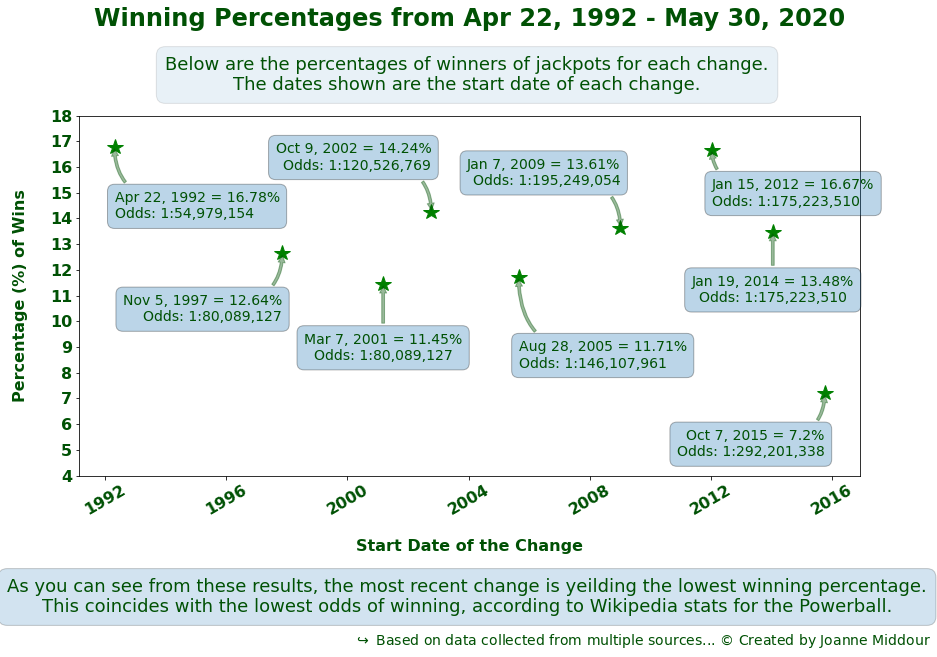

In [ ]:
# Create a bar graph to show how the winning percentage has changed:
fig, ax = plt.subplots(1, 1, figsize=(14, 10), facecolor='white')
plt.subplots_adjust(top=1.5, bottom=1)

# Set up the text to add to the figure:
ax.set_title('Winning Percentages from Apr 22, 1992 - May 30, 2020\n\n\n', size=24, weight='bold', color='#005104')
plt.figtext(.51, 1.535, 'Below are the percentages of winners of jackpots for each change.\nThe dates shown are the start date of each change.', 
            size=18, ha='center', color='#005104', bbox=dict(alpha=.1, 
                                                             boxstyle='round, pad=.5'))
plt.figtext(0.51, .81, s='As you can see from these results, the most recent change is yeilding the lowest winning percentage.\nThis coincides with the lowest odds of winning, according to Wikipedia stats for the Powerball.', 
            size=18, ha='center', color='#005104', bbox=dict(alpha=.2, 
                                                             boxstyle='round, pad=.5'))
plt.figtext(0.97, .765, s=r'$\hookrightarrow$ Based on data collected from multiple sources... $\copyright$ Created by Joanne Middour', 
            size=14, ha='right', color='#005104')

# Plot the data:
ax.plot_date(x=wins['Rev Start'], y=wins['Win Percent'], fmt='*', ms=16, 
             animated=True, color='green', label=(wins['Rev Start'],
                                                  wins['Win Percent']))

# Create arrow properties:
aprops = dict(facecolor='#005104', arrowstyle='simple', 
              connectionstyle='angle3, angleA=0, angleB=-90', 
              alpha=0.4, edgecolor='#005104')

# Add text boxes to points:
plt.annotate('Apr 22, 1992 = 16.78%\nOdds: 1:54,979,154', xy=(wins['Rev Start'][0], 
                                         wins['Win Percent'][0]),
             xycoords='data', xytext=(wins['Rev Start'][0], 14), size=14, ha='left', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Nov 5, 1997 = 12.64%\nOdds: 1:80,089,127', xy=(wins['Rev Start'][1], 
                                         wins['Win Percent'][1]),
             xycoords='data', xytext=(wins['Rev Start'][1], 10), size=14, ha='right', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Mar 7, 2001 = 11.45%\nOdds: 1:80,089,127', xy=(wins['Rev Start'][2], 
                                         wins['Win Percent'][2]),
             xycoords='data', xytext=(wins['Rev Start'][2], 8.5), size=14, ha='center', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Oct 9, 2002 = 14.24%\nOdds: 1:120,526,769', xy=(wins['Rev Start'][3], 
                                         wins['Win Percent'][3]),
             xycoords='data', xytext=(wins['Rev Start'][3], 15.9), size=14, ha='right', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Aug 28, 2005 = 11.71%\nOdds: 1:146,107,961', xy=(wins['Rev Start'][4], 
                                         wins['Win Percent'][4]),
             xycoords='data', xytext=(wins['Rev Start'][4], 8.2), size=14, ha='left', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Jan 7, 2009 = 13.61%\nOdds: 1:195,249,054', xy=(wins['Rev Start'][5], 
                                         wins['Win Percent'][5]),
             xycoords='data', xytext=(wins['Rev Start'][5], 15.3), size=14, ha='right', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Jan 15, 2012 = 16.67%\nOdds: 1:175,223,510', xy=(wins['Rev Start'][6], 
                                         wins['Win Percent'][6]),
             xycoords='data', xytext=(wins['Rev Start'][6], 14.5), size=14, ha='left', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Jan 19, 2014 = 13.48%\nOdds: 1:175,223,510', xy=(wins['Rev Start'][7], 
                                         wins['Win Percent'][7]),
             xycoords='data', xytext=(wins['Rev Start'][7], 10.75), size=14, ha='center', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)
plt.annotate('Oct 7, 2015 = 7.2%\nOdds: 1:292,201,338', xy=(wins['Rev Start'][8], 
                                         wins['Win Percent'][8]), 
             xycoords='data', xytext=(wins['Rev Start'][8], 4.75), size=14, ha='right', 
             color='#005104', bbox=dict(alpha=0.3, boxstyle='round, pad=.5'), arrowprops=aprops)


# Set up the ticks:
ax.set_xlabel('\nStart Date of the Change', size=16, weight='bold', color='#005104')
plt.ylabel('Percentage (%) of Wins\n', size=16, weight='bold', 
           color='#005104')
plt.xticks(color='#005104', size=16, weight='bold', rotation=30)
plt.yticks(ticks=range(4, 19), color='#005104', size=16, weight='bold');

In [ ]:
# Create a new column with the percentage of rollovers:
wins['Rollover Percent'] = ((wins['Total Games'] - wins['Winners']) / wins['Total Games'] * 100).astype(float)
wins['Rollover Percent'] = round(wins['Rollover Percent'], 2)
wins

,Rev Start,Rev End,Winners,Total Games,Win Percent,Rollover Percent
0,1992-04-22,1997-11-04,97,578,16.78,83.22
1,1997-11-05,2001-03-06,44,348,12.64,87.36
2,2001-03-07,2002-10-08,19,166,11.45,88.55
3,2002-10-09,2005-08-27,43,302,14.24,85.76
4,2005-08-28,2009-01-06,41,350,11.71,88.29
5,2009-01-07,2012-01-14,43,316,13.61,86.39
6,2012-01-15,2014-01-18,35,210,16.67,83.33
7,2014-01-19,2015-10-06,24,178,13.48,86.52
8,2015-10-07,2020-05-30,35,486,7.20,92.80


In [ ]:
# Create a new dataframe to reformat:
wins_tab = pd.DataFrame(wins)
wins_tab.dtypes

Rev Start           datetime64[ns]
Rev End             datetime64[ns]
Winners                      int64
Total Games                  int64
Win Percent                float64
Rollover Percent           float64
dtype: object

In [ ]:
# Reformat to show better as a visual table:
wins_tab['Rev Start'] = wins_tab['Rev Start'].dt.strftime('%b %d, %Y')
wins_tab['Rev End'] = wins['Rev End'].dt.strftime('%b %d, %Y')
wins_tab

,Rev Start,Rev End,Winners,Total Games,Win Percent,Rollover Percent
0,"Apr 22, 1992","Nov 04, 1997",97,578,16.78,83.22
1,"Nov 05, 1997","Mar 06, 2001",44,348,12.64,87.36
2,"Mar 07, 2001","Oct 08, 2002",19,166,11.45,88.55
3,"Oct 09, 2002","Aug 27, 2005",43,302,14.24,85.76
4,"Aug 28, 2005","Jan 06, 2009",41,350,11.71,88.29
5,"Jan 07, 2009","Jan 14, 2012",43,316,13.61,86.39
6,"Jan 15, 2012","Jan 18, 2014",35,210,16.67,83.33
7,"Jan 19, 2014","Oct 06, 2015",24,178,13.48,86.52
8,"Oct 07, 2015","May 30, 2020",35,486,7.20,92.80


In [ ]:
# Change data type of datetime and percentage columns to object:
wins_tab['Rev Start'] = wins_tab['Rev Start'].astype(object)
wins_tab['Rev End'] = wins_tab['Rev End'].astype(object)
wins_tab['Win Percent'] = wins_tab['Win Percent'].astype(object)
wins_tab['Rollover Percent'] = wins_tab['Rollover Percent'].astype(object)
wins_tab.dtypes

Rev Start           object
Rev End             object
Winners              int64
Total Games          int64
Win Percent         object
Rollover Percent    object
dtype: object

In [ ]:
# Add % symbols:
wins_tab['Win Percent'] = wins_tab['Win Percent'].astype(str) + '%'
wins_tab['Rollover Percent'] = wins_tab['Rollover Percent'].astype(str) + '%'
wins_tab

,Rev Start,Rev End,Winners,Total Games,Win Percent,Rollover Percent
0,"Apr 22, 1992","Nov 04, 1997",97,578,16.78%,83.22%
1,"Nov 05, 1997","Mar 06, 2001",44,348,12.64%,87.36%
2,"Mar 07, 2001","Oct 08, 2002",19,166,11.45%,88.55%
3,"Oct 09, 2002","Aug 27, 2005",43,302,14.24%,85.76%
4,"Aug 28, 2005","Jan 06, 2009",41,350,11.71%,88.29%
5,"Jan 07, 2009","Jan 14, 2012",43,316,13.61%,86.39%
6,"Jan 15, 2012","Jan 18, 2014",35,210,16.67%,83.33%
7,"Jan 19, 2014","Oct 06, 2015",24,178,13.48%,86.52%
8,"Oct 07, 2015","May 30, 2020",35,486,7.2%,92.8%


In [ ]:
# Color variables:
row_colors = [['white','#DFFFE1', 'white','#DFFFE1', 'white','#DFFFE1', 
              'white','#DFFFE1', 'white']]

enable_plotly_in_cell()

# Create a plotly table to display on my blog post:
wins_fig = go.Figure(data=[go.Table(header=dict(values=[['<b>Revision<br>Start</b>'],
                                                        ['<b>Revision<br>End</b>'],
                                                        ['<b>Number of<br>Winners</b>'],
                                                        ['<b>Total<br>Games</b>'],
                                                        ['<b>Winning<br>Percentage</b>'],
                                                        ['<b>Rollover<br>Percentage</b>']],
                                                fill_color='#005104', 
                                                line_color='gray', 
                                                align=['center', 'center'],
                                                font=dict(color='#DFFFE1', size=14),
                                                height=40),
                                    cells=dict(values=[wins_tab['Rev Start'], 
                                                       wins_tab['Rev End'], 
                                                       wins_tab['Winners'], 
                                                       wins_tab['Total Games'],
                                                       wins_tab['Win Percent'],
                                                       wins_tab['Rollover Percent']], 
                                               line_color='gray',
                                               fill_color=row_colors,
                                               align=['center', 'center'],
                                               font=dict(color='#005104', 
                                                         size=11)))])
wins_fig.update_layout(title_text='Powerball Percentages per Revision')
wins_fig.show()

In [ ]:
# Are there any winning combos that were duplicated?
pb4['Winning Combo'].describe()

count                  2934
unique                 2933
top       15 22 24 32 39 18
freq                      2
Name: Winning Combo, dtype: object

In [ ]:

# Look at the only combo that repeated:
cc = pb4['Winning Combo'] == '15 22 24 32 39 18'
coc = pb4[cc].sort_values(by='Winning Combo', ignore_index=True, 
                                  ascending=False)
comc = pd.DataFrame(coc)
combc = comc.drop(columns=['No1', 'No2', 'No3', 'No4', 'No5', 'PB', 
                                'PP', 'St3', 'St4'])
combo_c = combc.rename(columns={'Draw Date':'Drawing Date', 
                                  'Winning Combo':'Winning Numbers', 
                                  'Jackpot(M)':'Jackpot',
                                  'St1':'State 1', 
                                  'St2':'State 2'})
combo_c

,Drawing Date,Winning Numbers,Jackpot,Winners,State 1,State 2,All States
0,1993-04-03,15 22 24 32 39 18,3.9,0,0,0,0
1,2000-12-27,15 22 24 32 39 18,32.8,2,DE,LA,"DE,LA"


In [ ]:
# Reformat the data to be more usable:
combo_c['Jackpot'] = '$' + combo_c['Jackpot'].astype(str) + ' Million'
combo_c = combo_c.replace([0],['None'])
combo_c['Drawing Date'][0] = datetime.datetime.strftime(combo_c['Drawing Date'][0], 
                                                        format='%b %d, %Y')
combo_c['Drawing Date'][1] = datetime.datetime.strftime(combo_c['Drawing Date'][1], 
                                                        format='%b %d, %Y')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
# Look at my dataframe:
combo_c

,Drawing Date,Winning Numbers,Jackpot,Winners,State 1,State 2,All States
0,"Apr 03, 1993",15 22 24 32 39 18,$3.9 Million,None,None,None,None
1,"Dec 27, 2000",15 22 24 32 39 18,$32.8 Million,2,DE,LA,"DE,LA"


In [ ]:
# Look at the values of the dataframe:
combo_c.values

array([['Apr 03, 1993', '15 22 24 32 39 18', '$3.9 Million', 'None',
        'None', 'None', 'None'],
       ['Dec 27, 2000', '15 22 24 32 39 18', '$32.8 Million', 2, 'DE',
        'LA', 'DE,LA']], dtype=object)

In [ ]:
# Make table in html code so I can post it in my blog:
com_html = combo_c.to_html(bold_rows=True, index=False, index_names=False)
print (com_html)

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th>Drawing Date</th>
      <th>Winning Numbers</th>
      <th>Jackpot</th>
      <th>Winners</th>
      <th>State 1</th>
      <th>State 2</th>
      <th>All States</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Apr 03, 1993</td>
      <td>15 22 24 32 39 18</td>
      <td>$3.9 Million</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
      <td>None</td>
    </tr>
    <tr>
      <td>Dec 27, 2000</td>
      <td>15 22 24 32 39 18</td>
      <td>$32.8 Million</td>
      <td>2</td>
      <td>DE</td>
      <td>LA</td>
      <td>DE,LA</td>
    </tr>
  </tbody>
</table>


In [ ]:
# Create a graph to show top 10 overall white balls and power balls:
ballsT10_plot = go.Bar(name='White Balls', x=whiteT10['White Ball'], y=whiteT10['Counts'], 
                       marker=dict(color='#999999',
                                   line=dict(width=8, color='#999999')))
ballsT10_plot2 = go.Bar(name='PowerBalls', x=pb_top10['PB'], y=pb_top10['Counts'], 
                        marker=dict(color='red',
                                   line=dict(width=8, color='red')))
ballsT10_lay = go.Layout(title={'text':'Top 10 Winning Numbers Apr 22, 1992 - May 30, 2020',
                             'y':0.90, 'x':0.50, 'xanchor':'center', 'yanchor':'top'},
                         xaxis=dict(title='Winning Numbers'),
                         yaxis=dict(title='Amount of Times Called'),
                         font=dict(family='Bookman Old Style', size=16, color='#1C5B1E'),
                         hoverlabel={'align':'left'}, 
                         annotations=[go.layout.Annotation(text='Based on data collected from multiple sources... Created by Joanne Middour',
                                       align='center', x=.95, xref='paper', 
                                       y=-0.23, yref='paper', font=dict(size=14),
                                       showarrow=False)])
enable_plotly_in_cell()
myfigballs = go.Figure([ballsT10_plot, ballsT10_plot2], ballsT10_lay)
myfigballs.show()

In [ ]:
# Create a groupby for the top 10 jackpots:
t10group = top10.groupby(['Jackpot(M)', 'Draw Date'])['Winning Combo'].sum()
# t10group_df = pb.DataFrame(t10group)
t10group_df = t10group.reset_index()
t10group_df

,Jackpot(M),Draw Date,Winning Combo
0,456.0,2018-03-17,22 57 59 60 66 07
1,487.0,2016-07-30,11 17 21 23 32 05
2,559.0,2018-01-06,12 61 30 29 33 26
3,564.0,2015-02-11,11 13 25 39 54 19
4,587.0,2012-11-28,05 16 22 23 29 06
5,590.0,2013-05-18,10 13 14 22 52 11
6,687.0,2018-10-27,08 12 13 19 27 04
7,758.0,2017-08-23,06 07 16 23 26 04
8,768.0,2019-03-27,16 20 37 44 62 12
9,1586.4,2016-01-13,04 08 19 27 34 10


In [ ]:
# Create graph to show top 10 overall jackpots:
top10_plot = go.Bar(x=top10['Jackpot(M)'], y=top10['Draw Date'], 
                    marker=dict(color='green',line=dict(width=4, color='green')),
                    orientation='h')
top10_lay = go.Layout(title={'text':'Top 10 Jackpots won Apr 22, 1992 - May 30, 2020',
                             'y':0.90, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                      xaxis=dict(title='Jackpot (Millions)'),
                      yaxis=dict(title='Drawing Date'),
                      font=dict(family='Bookman Old Style', size=16, color='#1C5B1E'),
                      hoverlabel={'align':'left'}, 
                      annotations=[go.layout.Annotation(text='Based on data collected from multiple sources... Created by Joanne Middour',
                                       align='center', x=.85, xref='paper', 
                                       y=-0.22, yref='paper', font=dict(size=14),
                                       showarrow=False)])
enable_plotly_in_cell()
myfigjac = go.Figure([top10_plot], top10_lay)
myfigjac.show()

In [ ]:
# Reformat how my datetime looks for pie chart:
t10pie_df = t10group_df
t10pie_df['Draw Date'] = t10pie_df['Draw Date'].dt.strftime('%b %d, %Y')
t10pie_df

,Jackpot(M),Draw Date,Winning Combo
0,456.0,"Mar 17, 2018",22 57 59 60 66 07
1,487.0,"Jul 30, 2016",11 17 21 23 32 05
2,559.0,"Jan 06, 2018",12 61 30 29 33 26
3,564.0,"Feb 11, 2015",11 13 25 39 54 19
4,587.0,"Nov 28, 2012",05 16 22 23 29 06
5,590.0,"May 18, 2013",10 13 14 22 52 11
6,687.0,"Oct 27, 2018",08 12 13 19 27 04
7,758.0,"Aug 23, 2017",06 07 16 23 26 04
8,768.0,"Mar 27, 2019",16 20 37 44 62 12
9,1586.4,"Jan 13, 2016",04 08 19 27 34 10


In [ ]:
# Create a pie chart to display overall top 10 jackpots: 
t10pie = go.Figure(go.Pie(values=t10group_df['Jackpot(M)'], 
                          labels=t10group_df['Draw Date'], 
                          title=dict(text=f'Top 10 Jackpots won Apr 22, 1992 - May 30, 2020 in Millions',
                                     position='top center', 
                                     font=dict(size=22)), 
                          textposition='inside', 
                          textinfo='value+percent',
                          texttemplate='%{value:$} <br> %{percent}'))
enable_plotly_in_cell()
t10pie.show()

In [ ]:
# Create a graph to show overall winning states: 
st_fig = px.choropleth(all_states, locations='State', color='Counts',
                       color_continuous_scale='greens', scope='usa', 
                       locationmode='USA-states', hover_data=['State'],
                       labels={'Counts':'Winners<br>==>', 'size':16})
enable_plotly_in_cell()
st_fig.update_layout(title={'text':'Powerball Winners per State',
                            'y':0.90, 'x':0.55, 'xanchor':'center', 
                            'yanchor':'top'}, font=dict(family='Bookman Old Style', 
                                                        size=20, color='#1C5B1E'), 
                     hoverlabel={'align':'left'}, geo_scope='usa', 
                     annotations=[go.layout.Annotation(text='Based on data collected from multiple sources... Created by Joanne Middour',
                                       align='center', x=1, xref='paper', 
                                       y=-0.05, yref='paper', font=dict(size=12),
                                       showarrow=False)])
st_fig.show()

### How changes have effected Powerball:

In [ ]:
# Create a graph to show the differences in jackpots:
top10_plot = go.Scatter(name='Overall', x=top10['Jackpot(M)'], y=top10['Draw Date'], 
                    marker=dict(size=14, color='green'), mode='markers')
jc1_plot = go.Scatter(name='04/22/92 - 11/04/97', x=t10_c1['Jackpot(M)'], 
                  y=t10_c1['Draw Date'], marker=dict(size=10, color='#D3E800'), 
                  mode='markers')
jc2_plot = go.Scatter(name='11/05/97 - 03/06/01', x=t10_c2['Jackpot(M)'], 
                  y=t10_c2['Draw Date'], marker=dict(size=10, color='#1396D4'), 
                  mode='markers')
jc3_plot = go.Scatter(name='03/07/01 - 10/08/02', x=t10_c3['Jackpot(M)'], 
                  y=t10_c3['Draw Date'], marker=dict(size=10, color='#864043'), 
                  mode='markers')
jc4_plot = go.Scatter(name='10/09/02 - 08/27/05', x=t10_c4['Jackpot(M)'], 
                  y=t10_c4['Draw Date'], marker=dict(size=10, color='#FC8389'), 
                  mode='markers')
jc5_plot = go.Scatter(name='08/28/05 - 01/06/09', x=t10_c5['Jackpot(M)'], 
                  y=t10_c5['Draw Date'], marker=dict(size=10, color='#B521BF'), 
                  mode='markers')
jc6_plot = go.Scatter(name='01/07/09 - 01/14/12', x=t10_c6['Jackpot(M)'], 
                  y=t10_c6['Draw Date'], marker=dict(size=10, color='#FE2503'), 
                  mode='markers')
jc7_plot = go.Scatter(name='01/15/12 - 01/18/14', x=t10_c7['Jackpot(M)'], 
                  y=t10_c7['Draw Date'], marker=dict(size=10, color='#03FEFB'), 
                  mode='markers')
jc8_plot = go.Scatter(name='01/19/14 - 10/06/15', x=t10_c8['Jackpot(M)'], 
                  y=t10_c8['Draw Date'], marker=dict(size=10, color='#D1B0EE'), 
                  mode='markers')
jc9_plot = go.Scatter(name='10/07/15 - 05/30/20', x=t10_c9['Jackpot(M)'], 
                  y=t10_c9['Draw Date'], marker=dict(size=10, color='#FF00CD'), 
                  mode='markers')
top10_lay = go.Layout(title={'text':'Top 10 Jackpots Won Between each Change<br>(Interactive)',
                             'y':0.89, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                      xaxis=dict(title='Jackpot (Millions)'),
                      yaxis=dict(title='Drawing Date'),
                      font=dict(family='Bookman Old Style', size=16, 
                                color='#1C5B1E'), hoverlabel={'align':'left'}, 
                      annotations=[go.layout.Annotation(text='Based on data collected from multiple sources... Created by Joanne Middour',
                                       align='right', x=1.25, xref='paper', 
                                       y=-0.24, yref='paper', font=dict(size=12),
                                       showarrow=False)])
enable_plotly_in_cell()
myfigjac = go.Figure([top10_plot, jc1_plot, jc2_plot, jc3_plot, jc4_plot, 
                      jc5_plot, jc6_plot, jc7_plot, jc8_plot, jc9_plot], top10_lay)
myfigjac.show()

In [ ]:
# Create a graph to show the differences in top winning numbers and pb numbers:
ballsT10_plot = go.Scatter(name='WB Overall', x=whiteT10['White Ball'], 
                           y=whiteT10['Counts'], marker=dict(color='#999999', 
                                                             size=14, opacity=.75), 
                           mode='markers')
ballsT10_plot2 = go.Scatter(name='PB Overall', x=pb_top10['PB'], 
                            y=pb_top10['Counts'], marker=dict(color='red', 
                                                              size=14, opacity=.75), 
                            mode='markers')
bc1_plot = go.Scatter(name='WB 04/22/92 - 11/04/97', x=whiteT10_c1['White Ball'], 
                      y=whiteT10_c1['Counts'], marker=dict(color='#D3E800', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc1_plot2 = go.Scatter(name='PB 04/22/92 - 11/04/97', x=pb_t10_c1['PB'], 
                       y=pb_t10_c1['Counts'], marker=dict(color='#1D8717', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc2_plot = go.Scatter(name='WB 11/05/97 - 03/06/01', x=whiteT10_c2['White Ball'], 
                      y=whiteT10_c2['Counts'], marker=dict(color='#1396D4', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc2_plot2 = go.Scatter(name='PB 11/05/97 - 03/06/01', x=pb_t10_c2['PB'], 
                       y=pb_t10_c2['Counts'], marker=dict(color='#0D21A2', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc3_plot = go.Scatter(name='WB 03/07/01 - 10/08/02', x=whiteT10_c3['White Ball'], 
                      y=whiteT10_c3['Counts'], marker=dict(color='#864043', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc3_plot2 = go.Scatter(name='PB 03/07/01 - 10/08/02', x=pb_t10_c3['PB'], 
                       y=pb_t10_c3['Counts'], marker=dict(color='#301D18', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc4_plot = go.Scatter(name='WB 10/09/02 - 08/27/05', x=whiteT10_c4['White Ball'], 
                      y=whiteT10_c4['Counts'], marker=dict(color='#FC8389', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc4_plot2 = go.Scatter(name='PB 10/09/02 - 08/27/05', x=pb_t10_c4['PB'], 
                       y=pb_t10_c4['Counts'], marker=dict(color='#FC007E', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc5_plot = go.Scatter(name='WB 08/28/05 - 01/06/09', x=whiteT10_c5['White Ball'], 
                      y=whiteT10_c5['Counts'], marker=dict(color='#B521BF', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc5_plot2 = go.Scatter(name='PB 08/28/05 - 01/06/09', x=pb_t10_c5['PB'], 
                       y=pb_t10_c5['Counts'], marker=dict(color='#540186', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc6_plot = go.Scatter(name='WB 01/07/09 - 01/14/12', x=whiteT10_c6['White Ball'], 
                      y=whiteT10_c6['Counts'], marker=dict(color='#FE2503', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc6_plot2 = go.Scatter(name='PB 01/07/09 - 01/14/12', x=pb_t10_c6['PB'], 
                       y=pb_t10_c6['Counts'], marker=dict(color='#BB1818', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc7_plot = go.Scatter(name='WB 01/15/12 - 01/18/14', x=whiteT10_c7['White Ball'], 
                      y=whiteT10_c7['Counts'], marker=dict(color='#03FEFB', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc7_plot2 = go.Scatter(name='PB 01/15/12 - 01/18/14', x=pb_t10_c7['PB'], 
                       y=pb_t10_c7['Counts'], marker=dict(color='#108B8F', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc8_plot = go.Scatter(name='WB 01/19/14 - 10/06/15', x=whiteT10_c8['White Ball'], 
                      y=whiteT10_c8['Counts'], marker=dict(color='#D1B0EE', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc8_plot2 = go.Scatter(name='PB 01/19/14 - 10/06/15', x=pb_t10_c8['PB'], 
                       y=pb_t10_c8['Counts'], marker=dict(color='#8A6FA0 ', 
                                                          size=12, opacity=.5), 
                       mode='markers')
bc9_plot = go.Scatter(name='WB 10/07/15 - 05/30/20', x=whiteT10_c9['White Ball'], 
                      y=whiteT10_c9['Counts'], marker=dict(color='#FF00CD', 
                                                           size=10, opacity=.5), 
                      mode='markers')
bc9_plot2 = go.Scatter(name='PB 10/07/15 - 05/30/20', x=pb_t10_c9['PB'], 
                       y=pb_t10_c9['Counts'], marker=dict(color='#8F0086', 
                                                          size=12, opacity=.5), 
                       mode='markers')
ballsT10_lay = go.Layout(title={'text':'Top 10 Winning Numbers Between each Change<br>(Interactive)',
                             'y':0.90, 'x':0.5, 'xanchor':'center', 'yanchor':'top'},
                         xaxis=dict(title='Winning Numbers'),
                         yaxis=dict(title='Amount of Times Called'),
                         font=dict(family='Bookman Old Style', size=16, color='#1C5B1E'),
                         hoverlabel={'align':'left'}, 
                         annotations=[go.layout.Annotation(text='Based on data collected from multiple sources... Created by Joanne Middour',
                                       align='center', x=1.3, xref='paper', 
                                       y=-0.24, yref='paper', font=dict(size=12),
                                       showarrow=False)])
enable_plotly_in_cell()
myfigballs = go.Figure([ballsT10_plot, ballsT10_plot2, bc1_plot, bc1_plot2, 
                        bc2_plot, bc2_plot2, bc3_plot, bc3_plot2, bc4_plot, 
                        bc4_plot2, bc5_plot, bc5_plot2, bc6_plot, bc6_plot2, 
                        bc7_plot, bc7_plot2, bc8_plot, bc8_plot2, bc9_plot, 
                        bc9_plot2], ballsT10_lay)
myfigballs.show()

In [ ]:
# # Create a pie chart to show the differences in top winning numbers & pb numbers:

# # Create subplot:
# fig = make_subplots(rows=3, cols=6, specs=[[{'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}, {'type':'domain'}], 
#                                             [{'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}, {'type':'domain'}], 
#                                             [{'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}, {'type':'domain'}, 
#                                             {'type':'domain'}, {'type':'domain'}]])

# # Add plots to subplot:
# fig.add_trace(go.Pie(labels=whiteT10_c1['White Ball'], values=whiteT10_c1['Counts'],
#                      name='WB 04/22/92 - 11/04/97'), 1, 1)
# fig.add_trace(go.Pie(labels=pb_t10_c1['PB'], values=pb_t10_c1['Counts'],
#                      name='PB 04/22/92 - 11/04/97'), 1, 2)
# fig.add_trace(go.Pie(labels=whiteT10_c2['White Ball'], values=whiteT10_c2['Counts'],
#                      name='WB 11/05/97 - 03/06/01'), 1, 3)
# fig.add_trace(go.Pie(labels=pb_t10_c2['PB'], values=pb_t10_c2['Counts'],
#                      name='PB 11/05/97 - 03/06/01'), 1, 4)
# fig.add_trace(go.Pie(labels=whiteT10_c3['White Ball'], values=whiteT10_c3['Counts'],
#                      name='WB 03/07/01 - 10/08/02'), 1, 5)
# fig.add_trace(go.Pie(labels=pb_t10_c3['PB'], values=pb_t10_c3['Counts'],
#                      name='PB 03/07/01 - 10/08/02'), 1, 6)
# fig.add_trace(go.Pie(labels=whiteT10_c4['White Ball'], values=whiteT10_c4['Counts'],
#                      name='WB 10/09/02 - 08/27/05'), 2, 1)
# fig.add_trace(go.Pie(labels=pb_t10_c4['PB'], values=pb_t10_c4['Counts'],
#                      name='PB 10/09/02 - 08/27/05'), 2, 2)
# fig.add_trace(go.Pie(labels=whiteT10_c5['White Ball'], values=whiteT10_c5['Counts'],
#                      name='WB 08/28/05 - 01/06/09'), 2, 3)
# fig.add_trace(go.Pie(labels=pb_t10_c5['PB'], values=pb_t10_c5['Counts'],
#                      name='PB 08/28/05 - 01/06/09'), 2, 4)
# fig.add_trace(go.Pie(labels=whiteT10_c6['White Ball'], values=whiteT10_c6['Counts'],
#                      name='WB 01/07/09 - 01/14/12'), 2, 5)
# fig.add_trace(go.Pie(labels=pb_t10_c6['PB'], values=pb_t10_c6['Counts'],
#                      name='PB 01/07/09 - 01/14/12'), 2, 6)
# fig.add_trace(go.Pie(labels=whiteT10_c7['White Ball'], values=whiteT10_c7['Counts'],
#                      name='WB 01/15/12 - 01/18/14'), 3, 1)
# fig.add_trace(go.Pie(labels=pb_t10_c7['PB'], values=pb_t10_c7['Counts'],
#                      name='PB 01/15/12 - 01/18/14'), 3, 2)
# fig.add_trace(go.Pie(labels=whiteT10_c8['White Ball'], values=whiteT10_c8['Counts'],
#                      name='WB 01/19/14 - 10/06/15'), 3, 3)
# fig.add_trace(go.Pie(labels=pb_t10_c8['PB'], values=pb_t10_c8['Counts'],
#                      name='PB 01/19/14 - 10/06/15'), 3, 4)
# fig.add_trace(go.Pie(labels=whiteT10_c9['White Ball'], values=whiteT10_c9['Counts'],
#                      name='WB 10/07/15 - 05/30/20'), 3, 5)
# fig.add_trace(go.Pie(labels=pb_t10_c9['PB'], values=pb_t10_c9['Counts'],
#                      name='PB 10/07/15 - 05/30/20'), 3, 6)

# # Use hole to create a donut-like pie chart:
# fig.update_traces(hole=.5, hoverinfo='label + percent + name')

# # Update layout for subplot:
# fig.update_layout(title_text='Winning Numbers Drawn for each Change', 
#                   annotations=[dict(text='Change 1', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 1', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 2', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 2', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 3', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 3', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 4', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 4', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 5', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 5', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 6', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 6', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 7', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 7', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 8', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 8', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 9', x=.15, y=.5, font_size=14), 
#                                dict(text='Change 9', x=.15, y=.5, font_size=14)])

# enable_plotly_in_cell()
# fig.show()

# *** Decided not to use, does not show data well. ***

### Create a barchart race:

In [ ]:
# # Libraries I need:
# import pandas as pd
# import matplotlib.pyplot as plt
# import matplotlib.ticker as ticker
# import matplotlib.animation as animation
# from IPython.display import HTML

In [ ]:
pb4.head()

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0,IN
1,1992-04-25,06,09,22,42,44,12,06 09 22 42 44 12,0,2.0,0,0,0,0,0,0
2,1992-04-29,01,08,10,28,35,10,01 08 10 28 35 10,0,4.0,0,0,0,0,0,0
3,1992-05-02,14,23,31,32,41,33,14 23 31 32 41 33,0,6.0,0,0,0,0,0,0
4,1992-05-06,27,29,30,36,43,04,27 29 30 36 43 04,0,7.8,0,0,0,0,0,0


In [ ]:
# Break down my data set with only the columns I need:
pb_race = pb4[['Draw Date', 'Winners', 'Jackpot(M)', 'All States']]
pb_race.head(10)

,Draw Date,Winners,Jackpot(M),All States
0,1992-04-22,1,5.9,IN
1,1992-04-25,0,2.0,0
2,1992-04-29,0,4.0,0
3,1992-05-02,0,6.0,0
4,1992-05-06,0,7.8,0
5,1992-05-09,0,10.2,0
6,1992-05-13,1,12.5,MN
7,1992-05-16,0,2.0,0
8,1992-05-20,0,3.6,0
9,1992-05-23,0,5.5,0


In [ ]:
# Remove all rows that have 0 winners:
pb_race_df = pb4[pb4['Winners'] >= 1].reset_index()
print (pb_race_df.shape)
pb_race_df.head()

(335, 17)


,index,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0,IN
1,6,1992-05-13,03,06,13,33,43,37,03 06 13 33 43 37,0,12.5,1,MN,0,0,0,MN
2,10,1992-05-27,30,32,41,42,44,06,30 32 41 42 44 06,0,7.1,1,IN,0,0,0,IN
3,16,1992-06-17,01,09,14,26,32,13,01 09 14 26 32 13,0,10.8,1,IN,0,0,0,IN
4,20,1992-07-01,10,24,31,33,45,30,10 24 31 33 45 30,0,6.0,1,WI,0,0,0,WI


In [ ]:
# Remove the unneeded index column:
pb_race_df = pb_race_df.drop(columns=['index'])
pb_race_df.head(3)

,Draw Date,No1,No2,No3,No4,No5,PB,Winning Combo,PP,Jackpot(M),Winners,St1,St2,St3,St4,All States
0,1992-04-22,02,25,35,41,42,15,02 25 35 41 42 15,0,5.9,1,IN,0,0,0,IN
1,1992-05-13,03,06,13,33,43,37,03 06 13 33 43 37,0,12.5,1,MN,0,0,0,MN
2,1992-05-27,30,32,41,42,44,06,30 32 41 42 44 06,0,7.1,1,IN,0,0,0,IN


#### Reformat my data:
Need to reformat my data to be able to use it on [Flourish Studios](https://app.flourish.studio/templates) to plot my bar chart race.

In [ ]:
# Remove columns not needed:
race_df = pb_race_df.drop(columns=['St1', 'St2', 'St3', 'St4', 'All States'])

# Reformat the datetime to show as Mmm DD, YYYY:
race_df['Draw Date'] = race_df['Draw Date'].dt.strftime('%b %d, %Y')

# Change the data type of my date column:
race_df['Draw Date'] = race_df['Draw Date'].astype(object)

# Transpose my dataframe:
race_df = race_df.T

# Use the first row as my new header:
new_head = race_df.iloc[0]

# Grab all rows but the 1st one:
race_df = race_df[1:]

# Add new headers to the dataframe:
race_df.columns = new_head

In [ ]:
race_df

Draw Date,"Apr 22, 1992","May 13, 1992","May 27, 1992","Jun 17, 1992","Jul 01, 1992","Jul 04, 1992","Jul 15, 1992","Aug 08, 1992","Sep 02, 1992","Oct 14, 1992","Nov 14, 1992","Dec 02, 1992","Dec 23, 1992","Jan 16, 1993","Mar 03, 1993","Mar 27, 1993","May 08, 1993","Jul 07, 1993","Aug 11, 1993","Sep 18, 1993","Oct 02, 1993","Oct 23, 1993","Dec 22, 1993","Jan 22, 1994","Feb 26, 1994","Mar 02, 1994","Apr 20, 1994","Apr 27, 1994","May 21, 1994","Jun 18, 1994","Jul 30, 1994","Aug 10, 1994","Aug 31, 1994","Sep 10, 1994","Oct 15, 1994","Nov 30, 1994","Dec 28, 1994","Jan 18, 1995","Mar 04, 1995","Apr 12, 1995",...,"Mar 25, 2015","Apr 11, 2015","Apr 18, 2015","Jun 03, 2015","Jun 20, 2015","Jul 04, 2015","Aug 01, 2015","Sep 30, 2015","Nov 04, 2015","Jan 13, 2016","Mar 02, 2016","May 07, 2016","Jul 30, 2016","Sep 17, 2016","Nov 26, 2016","Dec 17, 2016","Feb 22, 2017","Mar 22, 2017","Apr 01, 2017","Jun 10, 2017","Aug 23, 2017","Sep 16, 2017","Oct 25, 2017","Jan 06, 2018","Mar 17, 2018","May 19, 2018","Jun 20, 2018","Aug 11, 2018","Oct 27, 2018","Dec 26, 2018","Mar 27, 2019","Jun 01, 2019","Jul 13, 2019","Aug 17, 2019","Sep 04, 2019","Sep 21, 2019","Nov 02, 2019","Jan 29, 2020","Feb 12, 2020","Apr 08, 2020"
No1,02,03,30,01,10,05,12,05,03,18,16,01,07,05,05,02,21,04,13,01,02,04,01,08,06,04,11,12,19,03,01,02,08,10,18,05,17,17,08,04,...,07,01,13,06,09,03,07,21,02,04,12,05,11,09,17,01,10,02,09,20,06,17,18,12,22,03,04,05,08,05,16,06,13,18,04,01,03,09,14,02
No2,25,06,32,09,24,07,18,14,09,20,21,04,12,07,09,03,22,08,22,08,04,06,03,15,09,08,12,19,33,12,02,11,11,11,23,13,27,19,23,07,...,19,12,22,08,10,06,13,39,12,08,13,25,17,19,19,08,13,09,32,26,07,18,22,61,57,06,14,43,12,25,20,15,23,21,08,09,23,12,47,37
No3,35,13,41,14,31,15,24,19,16,23,24,26,21,08,15,13,36,19,39,18,21,21,13,22,11,24,22,30,36,14,08,20,19,20,24,24,40,28,32,13,...,23,32,23,13,16,14,24,40,17,19,44,26,21,51,21,16,28,27,36,32,16,24,29,30,59,09,23,56,13,38,37,34,32,24,30,22,32,15,54,39
No4,41,33,42,26,33,22,30,26,24,34,36,35,25,25,16,14,43,28,42,29,25,38,15,25,19,37,24,33,39,27,21,27,23,27,26,29,43,32,36,27,...,50,42,29,37,20,18,49,55,20,27,52,44,23,55,37,40,52,29,44,38,23,25,54,29,60,17,27,62,19,52,44,45,35,30,52,36,37,31,55,48
No5,42,43,44,32,45,45,36,30,34,40,43,42,31,28,26,17,45,41,44,38,36,39,29,33,23,43,26,36,44,35,31,44,34,44,35,31,44,38,41,35,...,54,58,31,40,57,24,57,59,65,34,62,66,32,62,44,48,61,42,65,58,26,31,57,33,66,56,56,68,27,67,62,52,68,60,59,68,58,60,68,54
PB,15,37,06,13,30,31,32,27,05,02,19,28,11,13,44,26,26,30,44,42,34,13,12,05,22,20,19,29,12,12,18,16,07,26,44,40,24,05,40,29,...,14,12,17,11,15,21,15,17,17,10,06,09,05,14,16,10,02,09,01,03,04,24,08,26,07,25,13,24,04,24,12,08,21,20,02,22,22,02,25,05
Winning Combo,02 25 35 41 42 15,03 06 13 33 43 37,30 32 41 42 44 06,01 09 14 26 32 13,10 24 31 33 45 30,05 07 15 22 45 31,12 18 24 30 36 32,05 14 19 26 30 27,03 09 16 24 34 05,18 20 23 34 40 02,16 21 24 36 43 19,01 04 26 35 42 28,07 12 21 25 31 11,05 07 08 25 28 13,05 09 15 16 26 44,02 03 13 14 17 26,21 22 36 43 45 26,04 08 19 28 41 30,13 22 39 42 44 44,01 08 18 29 38 42,02 04 21 25 36 34,04 06 21 38 39 13,01 03 13 15 29 12,08 15 22 25 33 05,06 09 11 19 23 22,04 08 24 37 43 20,11 12 22 24 26 19,12 19 30 33 36 29,19 33 36 39 44 12,03 12 14 27 35 12,01 02 08 21 31 18,02 11 20 27 44 16,08 11 19 23 34 07,10 11 20 27 44 26,18 23 24 26 35 44,05 13 24 29 31 40,17 27 40 43 44 24,17 19 28 32 38 05,08 23 32 36 41 40,04 07 13 27 35 29,...,07 19 23 50 54 14,01 12 32 42 58 12,13 22 23 29 31 17,06 08 13 37 40 11,09 10 16 20 57 15,03 06 14 18 24 21,07 13 24 49 57 15,21 39 40 55 59 17,02 12 17 20 65 17,04 08 19 27 34 10,12 13 44 52 62 06,05 25 26 44 66 09,11 17 21 23 32 05,09 19 51 55 62 14,17 19 21 37 44 16,01 08 16 40 48 10,10 13 28 52 61 02,02 09 27 29 42 09,09 32 36 44 65 01,20 26 32 38 58 03,06 07 16 23 26 04,17 18 24 25 31 24,18 22 29 54 57 08,12 61 30 29 33 26,22 57 59 60 66 07,03 06 09 17 56 25,04 14 23 27 56 13,05 43 56 62 68 24,08 12 13 19 27 04,05 25 38 52 67 24,16 20 37 44 62 12,06 

In [ ]:
# Convert my dataframe to a csv file so I can run it on flourish:
race_df.to_csv('pb_race.csv')

After countless hours of trying to code my own bar chart race within colab to no avail. I decided to use Flourish to create the chart. I just kept running up against a brick wall no matter what I tried. I still have a copy of all the code I tried in another notebook. However, I deleted the cells from here that had my work so this would be a clean copy. If you are interested in seeing that, please contact me. 